# **Projet économétrie - Cassandre & Estelle**

## **I. Installation des packages**

In [ ]:
install.packages("googledrive")
install.packages("readxl")
install.packages("lubridate")
install.packages("dplyr")
install.packages("ggplot2")
install.packages("urca")
install.packages("exuber")
install.packages("forecast")


install.packages("reshape")
install.packages("data.table")
install.packages('lmtest')
install.packages('sandwich')
install.packages("tseries")
install.packages("quantmod")
install.packages("TT")
install.packages("tidyverse")

remotes::install_github("dbnomics/rdbnomics", build_vignettes = TRUE, force = TRUE)
install.packages("reshape2")
install.packages("vars")
install.packages("lpirfs")
install.packages("data.table")


sessionInfo()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rngtools’, ‘iterators’, ‘snow’, ‘doRNG’, ‘doSNOW’, ‘foreach’, ‘Rcpp’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘zoo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also in

jsonlite (1.8.7 -> 1.8.8) [CRAN]
curl     (5.0.2 -> 5.2.0) [CRAN]


Installing 2 packages: jsonlite, curl

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpOtryKf/remotesd336c8fb5/dbnomics-rdbnomics-a1db6e5/DESCRIPTION’ ... OK
* preparing ‘rdbnomics’:
* checking DESCRIPTION meta-information ... OK
* installing the package to build vignettes
* creating vignettes ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘rdbnomics_0.6.4.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘strucchange’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘miscTools’, ‘rbibutils’, ‘bdsmatrix’, ‘collapse’, ‘maxLik’, ‘Rdpack’, ‘Formula’, ‘doParallel’, ‘gridExtra’, ‘plm’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



R version 4.3.2 (2023-10-31)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 22.04.3 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.20.so;  LAPACK version 3.10.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] crayon_1.5.2      vctrs_0.6.4       cli_3.6.1         rlang_1.1.2      
 [5] processx_3.8.2    jsonlite_1.8.7    glue_1.6.2        prettyunits_1.2.

## **II. Importation des données**


In [ ]:
library(googledrive)
library(readxl)

# Importation des données FEDFUND
drive_download("https://docs.google.com/spreadsheets/d/103LhoAqEeT_Ht77d_siuRMqzVGNHavz46iX-8heOxdw/edit?usp=sharing",overwrite=TRUE)

# Prise en main des données (ligne 593 pour commencer au même moment que la seconde série temporelle)
FEDFUND <- read_xlsx(path = "FEDFUND.xlsx", skip = 593, sheet = "FF")
colnames(FEDFUND) <- c("Date", "DataFF")

# Conversion de la colonne Date au format date Year/Month/Day
FEDFUND$Date<-as.Date(FEDFUND$Date,format = "%d/%m/%Y")

# Affichage des données (aperçu)
tail(FEDFUND$Date)

# Données manquantes ?
sapply(FEDFUND,function(x) sum(is.na(x)))

Is it OK to cache OAuth access credentials in the folder ~/.cache/gargle
between R sessions?
1: Yes
2: No


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=3a68ea5ab6e5b3706db483cafbf59271&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWZKb2hYbnY2bGJ0eUtVUmxySWFOellZbVBTbXkxdFNNOThYS3A4VE1semxFSTI5WE5rX3Q2NmxXcVgwbzhfZGwycU5HZyIsInN0YXRlIjoiM2E2OGVhNWFiNmU1YjM3MDZkYjQ4M2NhZmJmNTkyNzEifQ==


File downloaded:

• FEDFUND <id: 103LhoAqEeT_Ht77d_siuRMqzVGNHavz46iX-8heOxdw>

Saved locally as:

• FEDFUND.xlsx



[1] "2023-04-01" "2023-05-01" "2023-06-01" "2023-07-01" "2023-08-01"
[6] "2023-09-01"

Date DataFF 
     0      0

Data is from the Federal Reserve official website: https://www.federalreserve.gov/releases/h15/

In [ ]:
# Importation des données S&P 500 Energy Sector
drive_download("https://docs.google.com/spreadsheets/d/1lpy5gr4A6-JG38DEBkndXgi0KhWqw9NknUmSaSrtRCY/edit?usp=sharing",overwrite = TRUE)

# Prise en main des données (1 car en-tête)
EnergySector<-read_xlsx(path = "S&P 500 Energy (Sector).xlsx",skip=1,sheet = "ES")
colnames(EnergySector)<-c("Date","DataES")

# Conversion de la colonne Date au format date Year/Month/Day
EnergySector$Date<-as.Date(EnergySector$Date,format = "%d/%m/%Y")

# Affichage des données (aperçu)
tail(EnergySector$Date)

# Données manquantes ?
sapply(EnergySector,function(x) sum(is.na(x)))

# Transformation des données journalières en moyennes mensuelles
library(lubridate)
library(dplyr)

# Calculer la moyenne par mois
EnergySector <- EnergySector %>%
  mutate(month = floor_date(Date, "month")) %>%
  group_by(month) %>%
  summarize(DataES_MonthlyMean = mean(DataES, na.rm = TRUE))

# Afficher les résultats
tail(EnergySector)

File downloaded:

• 'S&P 500 Energy (Sector)' <id: 1lpy5gr4A6-JG38DEBkndXgi0KhWqw9NknUmSaSrtRCY>

Saved locally as:

• S&P 500 Energy (Sector).xlsx



[1] "2023-07-31" "2023-08-01" "2023-08-02" "2023-08-03" "2023-08-04"
[6] "2023-08-07"

Date DataES 
     0      0


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




month,DataES_MonthlyMean
<date>,<dbl>
2023-03-01,623.6957
2023-04-01,659.1595
2023-05-01,608.2655
2023-06-01,611.6171
2023-07-01,638.2050
2023-08-01,662.7600


Data is from investing.com website: https://fr.investing.com/indices/s-p-500-energy

## **III. Représentations graphiques des données**


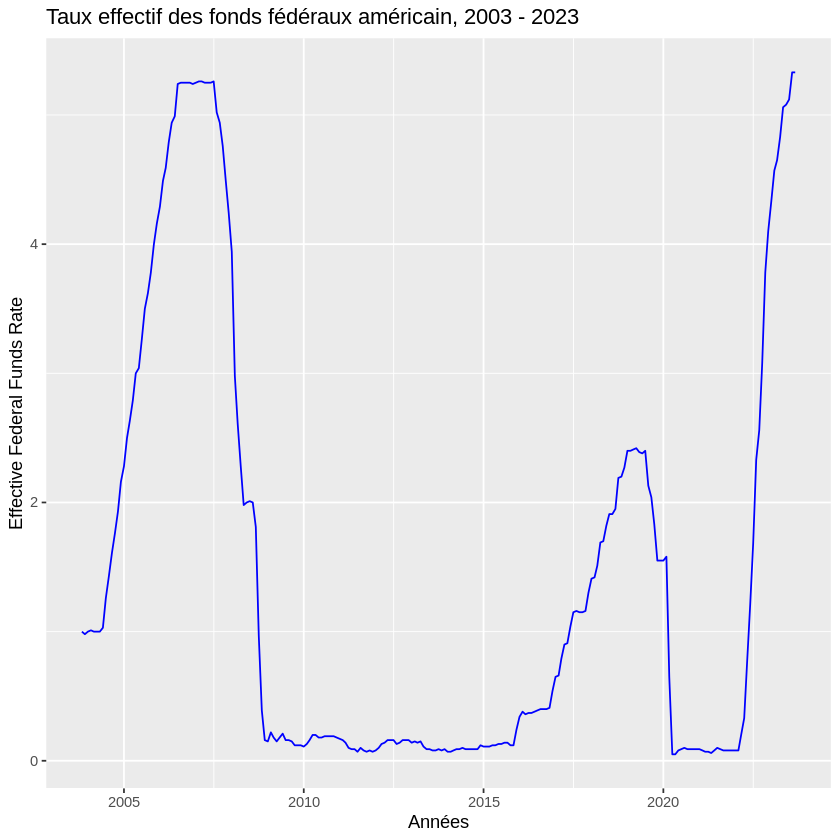

In [ ]:
library(ggplot2)

# Données FEDFUND
Graph1<-ggplot(data = FEDFUND, aes(x = Date, y = DataFF)) +
  geom_line(colour='blue') +
  labs(x = "Années", y = "Effective Federal Funds Rate") +
  ggtitle("Taux effectif des fonds fédéraux américain, 2003 - 2023")
Graph1

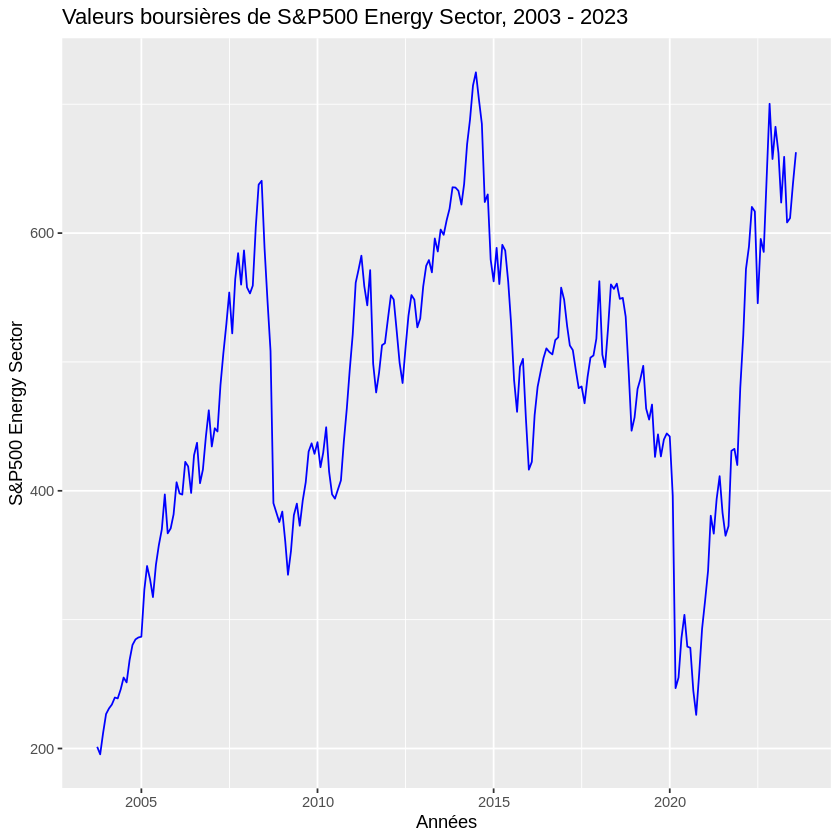

In [ ]:
# Données Energy Sector
Graph2 <- ggplot(data = EnergySector, aes(x = month, y = DataES_MonthlyMean)) +
  geom_line(colour = 'blue') +
  labs(x = "Années", y = "S&P500 Energy Sector") +
  ggtitle("Valeurs boursières de S&P500 Energy Sector, 2003 - 2023")
Graph2

## **IV. Passage en ln et représentations graphiques**


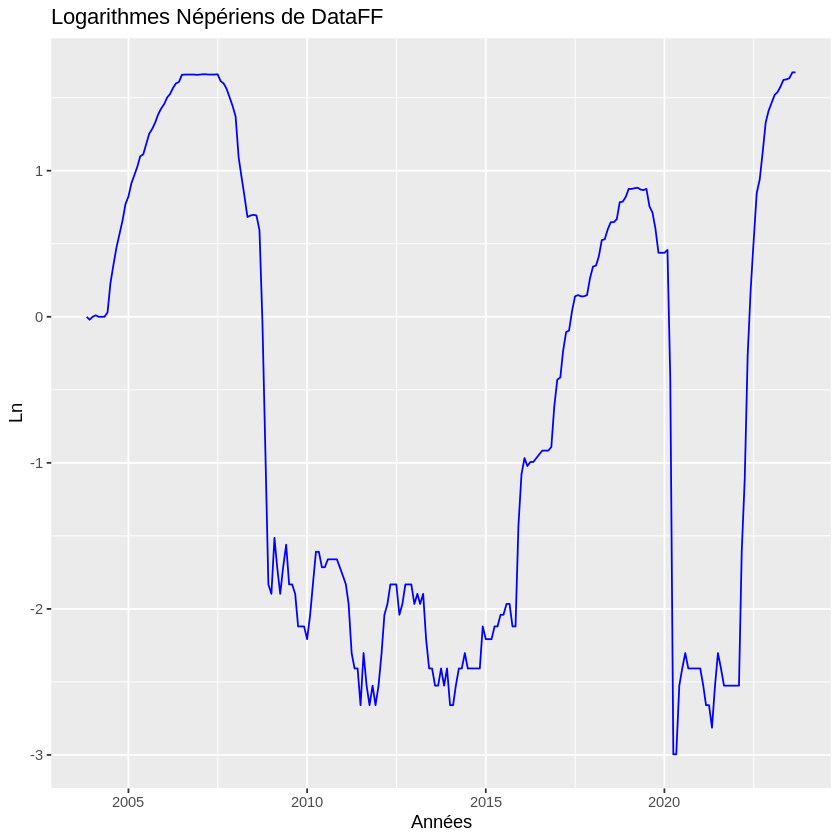

In [ ]:
# FEDFUND
# Calcul du ln de la colonne "DataFF" et stockage dans une nouvelle colonne
FEDFUND$log_DataFF <- log(FEDFUND$DataFF)

# Représentation graphique
library(ggplot2)
Graph3<-ggplot(data = FEDFUND, aes(x = Date, y = log_DataFF)) +
  geom_line(colour='blue') +
  labs(x = "Années", y = "Ln") +
  ggtitle("Logarithmes Népériens de DataFF")
Graph3

[1] 6.435663 6.490965 6.410611 6.416107 6.458660 6.496413

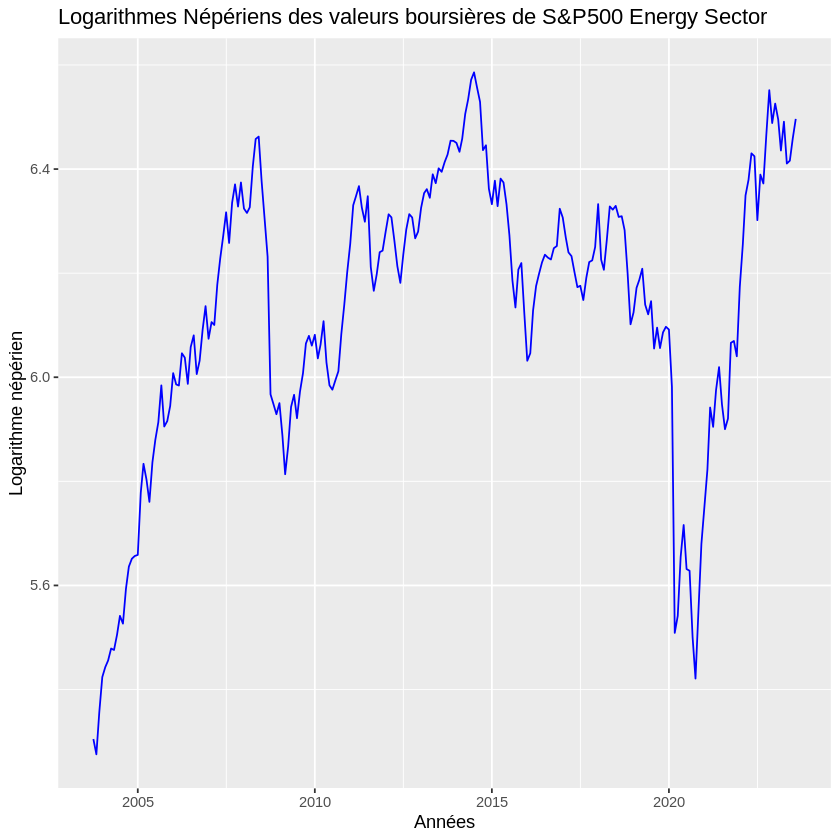

In [ ]:
# Energy Sector
# Calcul du ln de la colonne "DataES" et stockage dans une nouvelle colonne
EnergySector$log_DataES <- log(EnergySector$DataES_MonthlyMean)
tail(EnergySector$log_DataES)
# Représentation Graphique
library(ggplot2)
Graph4<-ggplot(data = EnergySector, aes(x = month, y = log_DataES)) +
  geom_line(colour='blue') +
  labs(x = "Années", y = "Logarithme népérien") +
  ggtitle("Logarithmes Népériens des valeurs boursières de S&P500 Energy Sector")
Graph4

## **Analyse de bulles spéculatives**

In [ ]:
library(urca)
library(exuber)

# Test ADF pour savoir combien de retards utiliser
adf1<-ur.df(y = EnergySector$log_DataES,type=c("drift"), lag=15, selectlags = c('AIC'))
summary(adf1)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.46403 -0.03067  0.00797  0.03954  0.12913 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.34648    0.11709   2.959  0.00342 **
z.lag.1     -0.05566    0.01897  -2.934  0.00370 **
z.diff.lag   0.19976    0.06559   3.046  0.00260 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06349 on 220 degrees of freedom
Multiple R-squared:  0.06783,	Adjusted R-squared:  0.05935 
F-statistic: 8.004 on 2 and 220 DF,  p-value: 0.0004412


Value of test-statistic is: -2.9343 4.5734 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.46 -2.88 -2.57
phi1  6.52  4.63  3.81


In [ ]:
x<-(EnergySector$log_DataES)
psy_minw(x) # taille conseillée de la fenetre d'estimation initiale
sprintf("La taille conseillée de la fenetre d'estimation initiale %f",psy_minw(x))
radf_D_PWY <-radf(x,lag=1) # utilise psy_minw(x) comme valeur par défaut
sprintf("La statistique du test SADF est %f",radf_D_PWY$sadf)

[1] 30

[1] "La taille conseillée de la fenetre d'estimation initiale 30.000000"

[1] "La statistique du test SADF est -1.183176"

In [ ]:
radf_crit$n30$sadf_cv

90%       95%       99% 
0.7396903 1.0386165 1.8058284

In [ ]:
diagnostics(radf_D_PWY,option = "sadf")

Using `radf_crit` for `cv`.



── Diagnostics (option = sadf) ────────────────────────────────── Monte Carlo ──

series1:  Cannot reject H0

## **V. Calcul et interpréation des différences premières des données (en log)**


On note $I_{t}$ le taux d'intérêt pour FEDFUND et l'indice Energy Sector pour Energy Sector, $i_{t}=log(I_{t})$ l'indice en logarithme, alors la différence première de l'indice en logarithme est : $$i_{t}-i_{t-1}=log(P_{t})-log(P_{t-1})=log(\frac{P{t}}{P_{t-1}}) = log(1+\frac{P_{t}-P_{t-1}}{P_{t-1}})\simeq  r_{t}$$

En calculant la différence première, on perd la première observation. On crée un nouveau dataframe contenant la série du taux de rendement avec les dates moins la première.

'data.frame':	238 obs. of  2 variables:
 $ Date: Date, format: "2003-12-01" "2004-01-01" ...
 $ rdt : num  -0.242 0.242 0.119 -0.119 0 ...


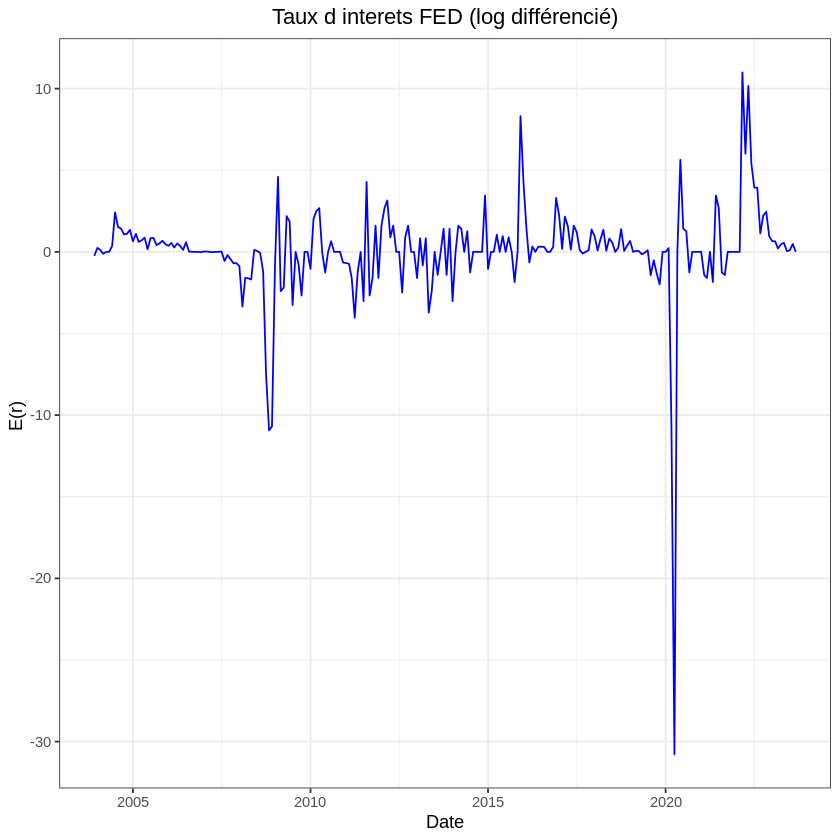

In [ ]:
# FEDFUND
r_FEDFUND<-data.frame(FEDFUND$Date[-1],12*diff(FEDFUND$log_DataFF))
colnames(r_FEDFUND)<-c('Date','rdt')
str(r_FEDFUND)

# Représentation graphique
Graph5<-ggplot(data=r_FEDFUND,aes(x=Date,y=rdt))+geom_line(colour='blue')+ggtitle('Taux d interets FED (log différencié)')+xlab('Date')+ylab('E(r) ')+theme_bw()+theme(plot.title = element_text(hjust = 0.5))
Graph5

'data.frame':	238 obs. of  2 variables:
 $ Date: Date, format: "2003-11-01" "2003-12-01" ...
 $ rdt : num  -0.353 0.969 0.812 0.231 0.151 ...


,Date,rdt
,<date>,<dbl>
233,2023-03-01,-0.71548457
234,2023-04-01,0.66363583
235,2023-05-01,-0.96424931
236,2023-06-01,0.06594136
237,2023-07-01,0.51063654
238,2023-08-01,0.45304062


,Date,rdt
,<date>,<dbl>
233,2023-03-01,-0.71548457
234,2023-04-01,0.66363583
235,2023-05-01,-0.96424931
236,2023-06-01,0.06594136
237,2023-07-01,0.51063654
238,2023-08-01,0.45304062


function (x, ...) 
UseMethod("mean")
<bytecode: 0x595e5fbf0f90>
<environment: namespace:base>

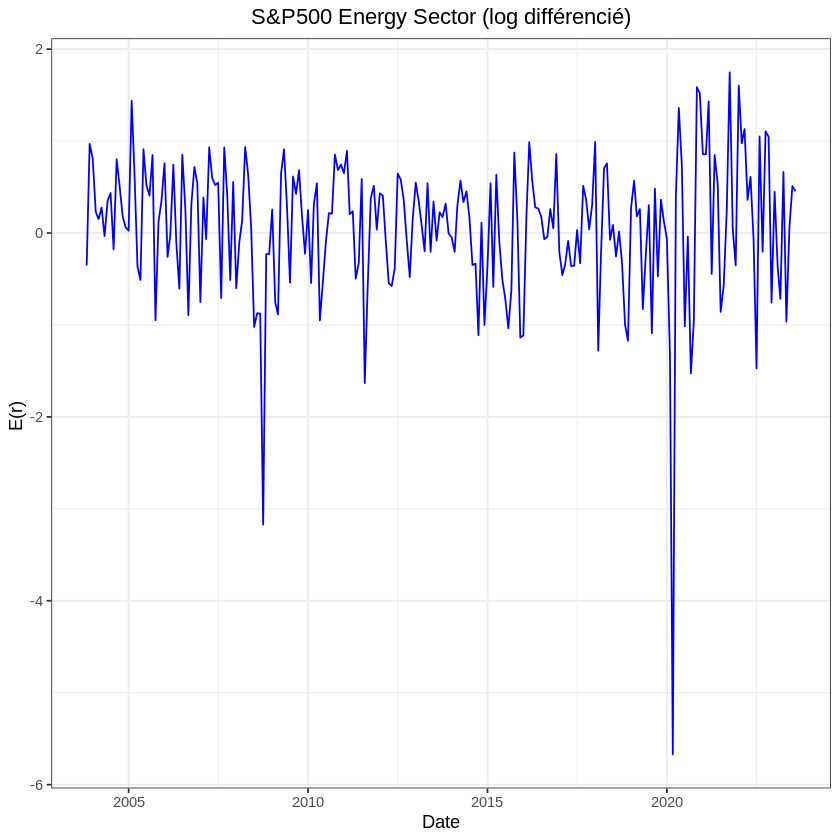

In [ ]:
# Energy Sector
r_EnergySector<-data.frame(EnergySector$month[-1],12*diff(EnergySector$log_DataES))
#r_EnergySector <- data.frame(Date = EnergySector$month[-1], rdt = 12 * diff(EnergySector$DataES_MonthlyMean, lag = 1))
colnames(r_EnergySector)<-c('Date','rdt')

#r_EnergySector <- data.frame(
# Date = EnergySector$month[-c(1, nrow(EnergySector))],
# rdt = 12 * diff(diff(EnergySector$log_DataES, lag = 1))
#)

str(r_EnergySector)

tail(r_EnergySector)

# Afficher les résultats
tail(r_EnergySector)

# Représentation graphique
Graph6<-ggplot(data=r_EnergySector,aes(x=Date,y=rdt))+geom_line(colour='blue')+ggtitle('S&P500 Energy Sector (log différencié)')+xlab('Date')+ylab('E(r) ')+theme_bw()+theme(plot.title = element_text(hjust = 0.5))
Graph6
mean

## **VI. ACF et PACF - log puis log différencié**


Autocorrelations of series ‘FEDFUND$log_DataFF’, by lag

    0     1     2     3     4     5     6     7     8     9    10    11    12 
1.000 0.982 0.954 0.924 0.892 0.860 0.825 0.788 0.749 0.708 0.666 0.621 0.576 
   13    14    15 
0.530 0.483 0.439 

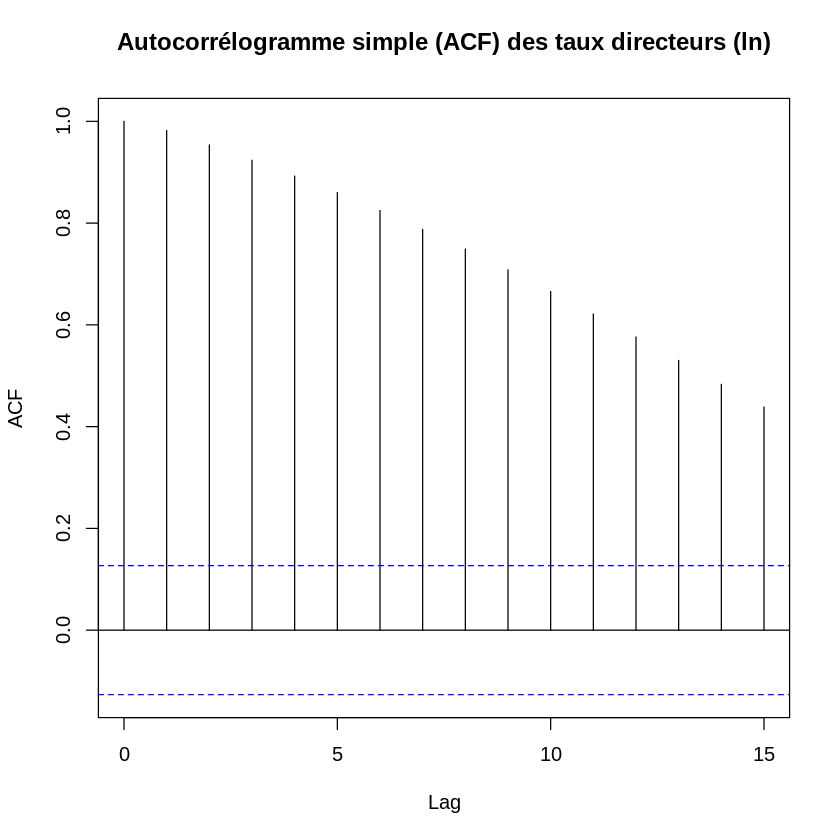


Partial autocorrelations of series ‘FEDFUND$log_DataFF’, by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.982 -0.302  0.032 -0.057 -0.033 -0.083 -0.043 -0.040 -0.073 -0.038 -0.057 
    12     13     14     15 
-0.034 -0.037 -0.048  0.064 

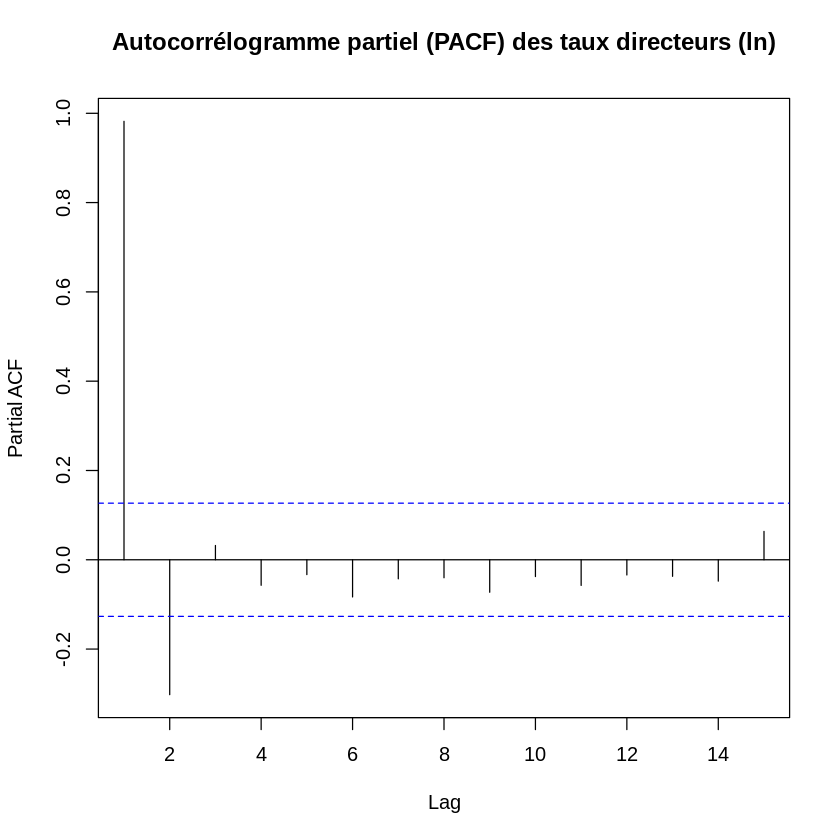


Autocorrelations of series ‘r_FEDFUND$rdt’, by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000  0.401  0.060  0.049  0.048  0.107  0.087  0.055  0.085  0.064  0.071 
    11     12     13     14     15 
 0.070  0.051  0.049 -0.044 -0.089 

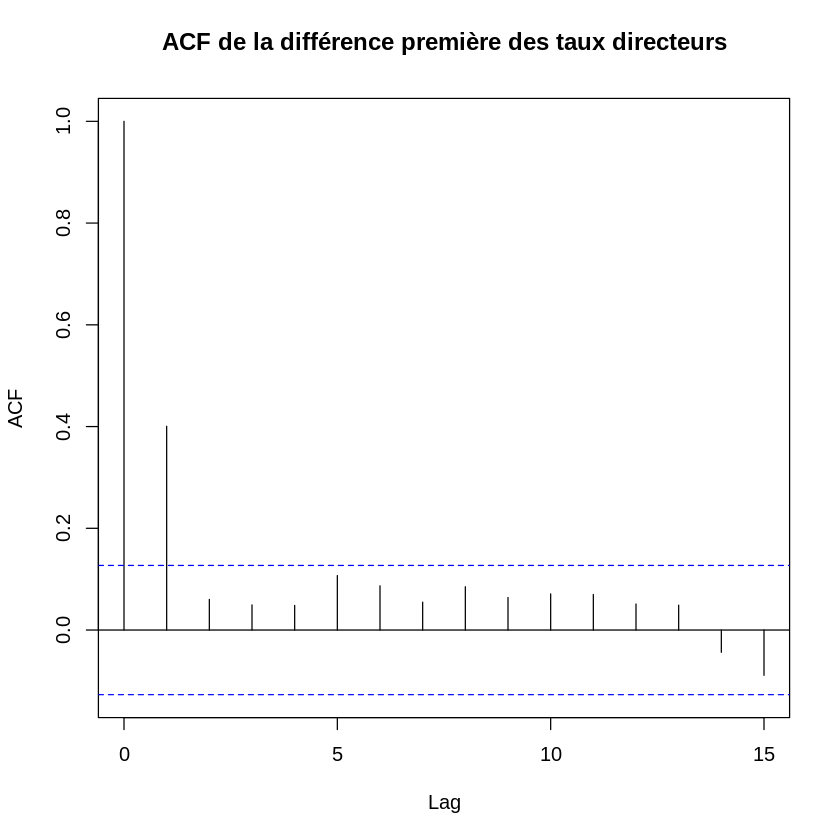


Partial autocorrelations of series ‘r_FEDFUND$rdt’, by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.401 -0.119  0.085  0.001  0.106  0.002  0.029  0.062  0.002  0.049  0.016 
    12     13     14     15 
 0.016  0.013 -0.098 -0.052 

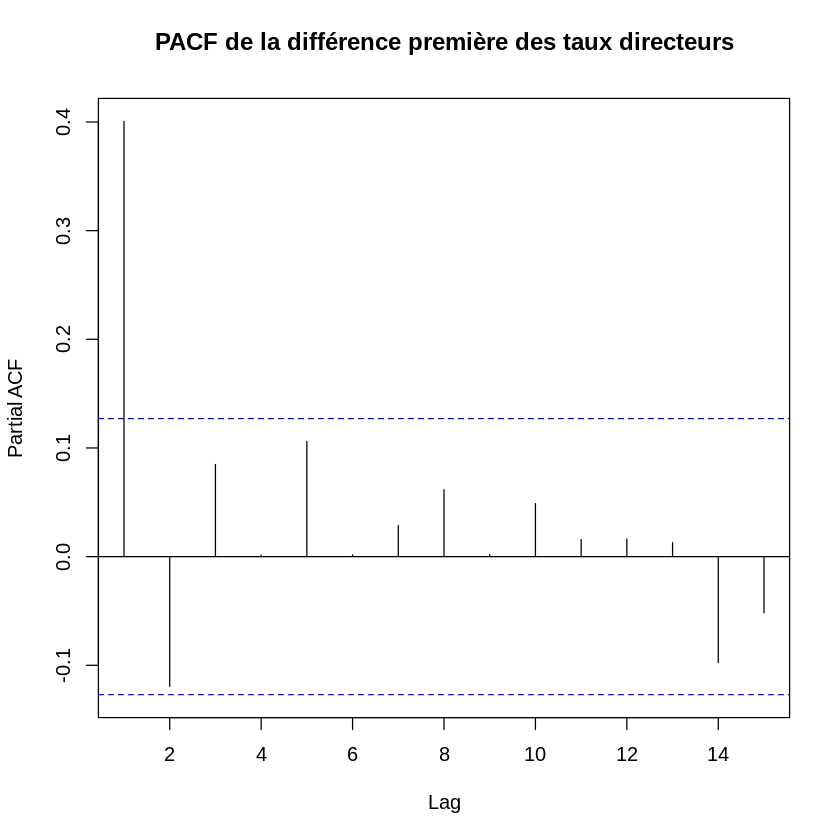

In [ ]:
# ACF FEDFUND log
Graph7<-acf(FEDFUND$log_DataFF, lag.max=15, main='Autocorrélogramme simple (ACF) des taux directeurs (ln)')
Graph7

# PACF FEDFUND log
Graph8<-pacf(FEDFUND$log_DataFF, lag.max=15, main='Autocorrélogramme partiel (PACF) des taux directeurs (ln)')
Graph8

# ACF FEDFUND log différencié
Graph9<-acf(r_FEDFUND$rdt, lag.max=15, main='ACF de la différence première des taux directeurs')
Graph9

# PACF FEDFUND log différencié
Graph10<-pacf(r_FEDFUND$rdt, lag.max=15, main='PACF de la différence première des taux directeurs')
Graph10


Autocorrelations of series ‘EnergySector$log_DataES’, by lag

    0     1     2     3     4     5     6     7     8     9    10    11    12 
1.000 0.951 0.891 0.840 0.792 0.743 0.693 0.641 0.582 0.529 0.477 0.424 0.375 
   13    14    15 
0.332 0.292 0.248 

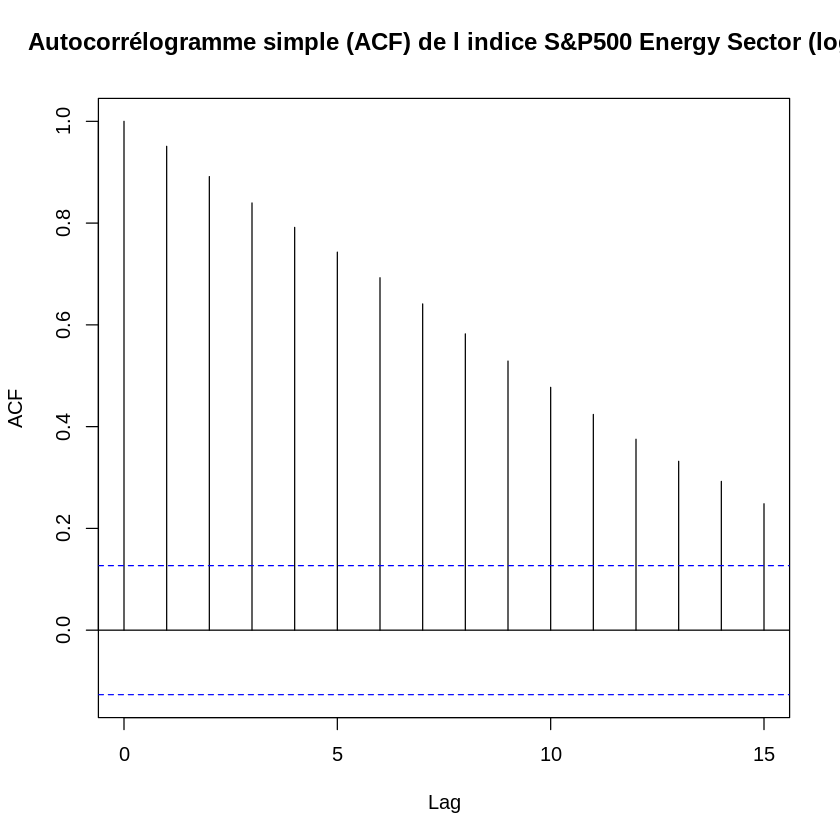


Partial autocorrelations of series ‘EnergySector$log_DataES’, by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.951 -0.134  0.061 -0.006 -0.034 -0.039 -0.039 -0.111  0.037 -0.043 -0.049 
    12     13     14     15 
 0.022  0.010  0.003 -0.071 

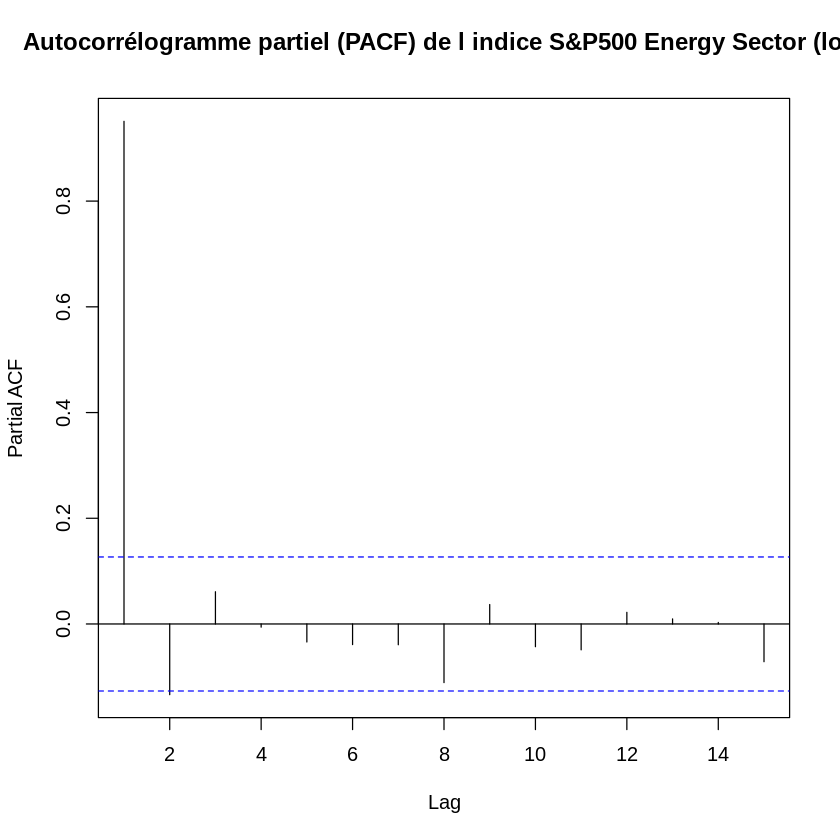


Autocorrelations of series ‘r_EnergySector$rdt’, by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000  0.179 -0.065 -0.018 -0.007  0.057  0.014  0.120 -0.068 -0.033  0.047 
    11     12     13     14     15 
 0.002 -0.075 -0.030  0.038  0.023 

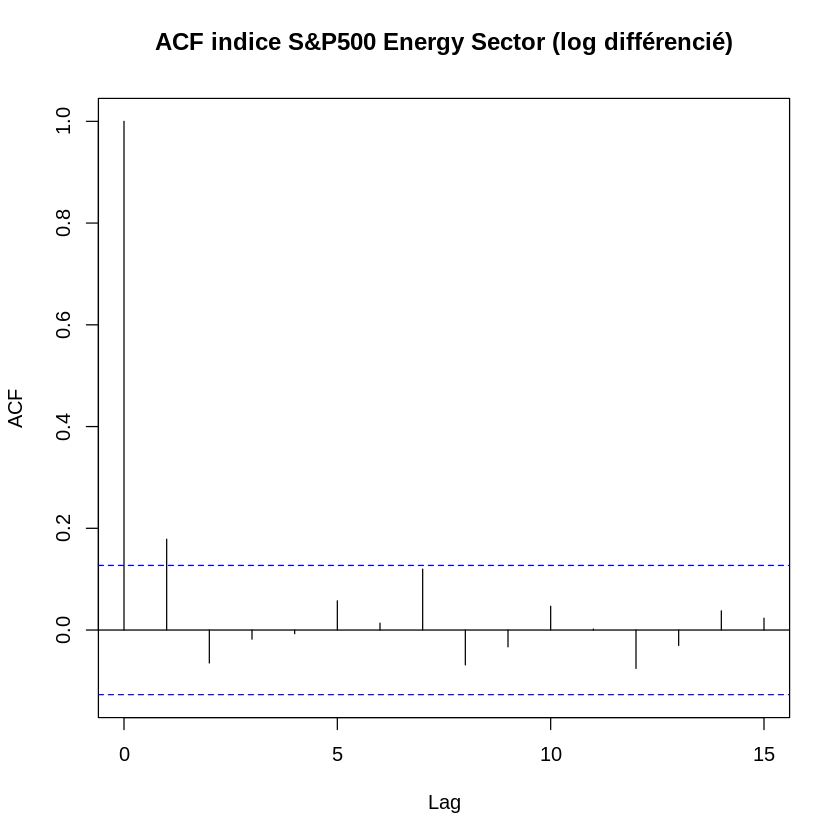


Partial autocorrelations of series ‘r_EnergySector$rdt’, by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.179 -0.100  0.013 -0.013  0.063 -0.012  0.135 -0.126  0.033  0.027 -0.009 
    12     13     14     15 
-0.094  0.022  0.007  0.035 

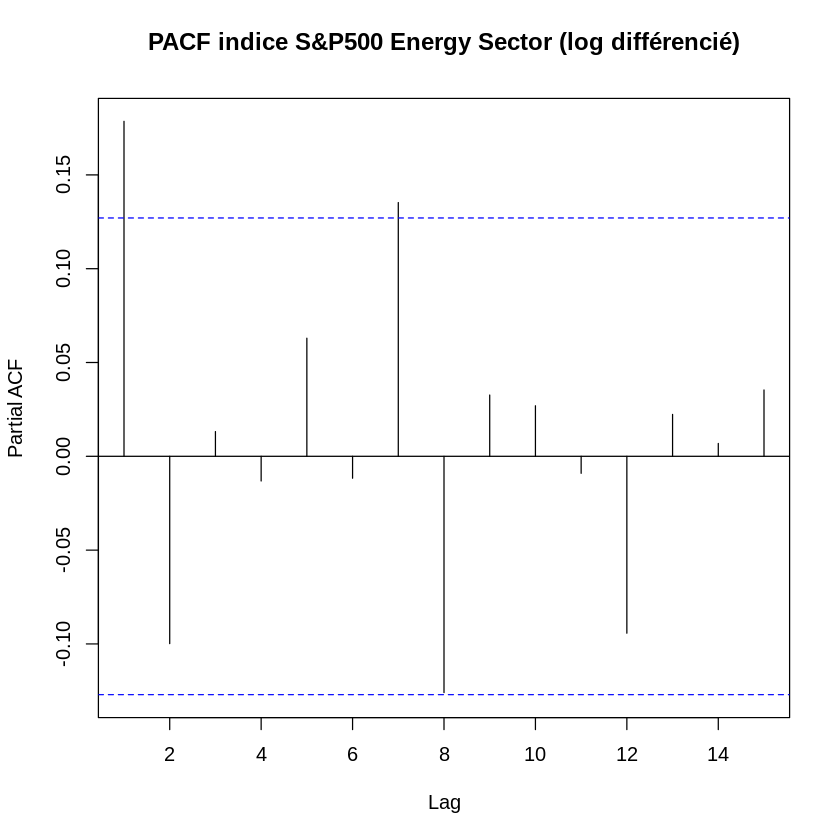

In [ ]:
# ACF Energy Sector log
Graph11<-acf(EnergySector$log_DataES, lag.max=15, main='Autocorrélogramme simple (ACF) de l indice S&P500 Energy Sector (log)')
Graph11

# PACF Energy Sector log
Graph12<-pacf(EnergySector$log_DataES, lag.max=15, main='Autocorrélogramme partiel (PACF) de l indice S&P500 Energy Sector (log)')
Graph12

# ACF Energy Sector log différencié
Graph13<-acf(r_EnergySector$rdt, lag.max=15, main='ACF indice S&P500 Energy Sector (log différencié)')
Graph13

# PACF Energy Sector log différencié
Graph14<-pacf(r_EnergySector$rdt, lag.max=15, main='PACF indice S&P500 Energy Sector (log différencié)')
Graph14

## **VII. ADF**

### ADF FEDFUND ln

In [ ]:
library(urca)

# FEDFUND ln M3 (cste + trend)
adf1<-ur.df(y = FEDFUND$log_DataFF,type=c("trend"), lag=15, selectlags = c('AIC'))
summary(adf1)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.18601 -0.04715  0.01411  0.06563  0.98522 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.0414369  0.0353586  -1.172   0.2425    
z.lag.1     -0.0130088  0.0103758  -1.254   0.2113    
tt           0.0002712  0.0002539   1.068   0.2866    
z.diff.lag1  0.4439587  0.0670052   6.626 2.66e-10 ***
z.diff.lag2 -0.1151588  0.0676922  -1.701   0.0903 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.237 on 218 degrees of freedom
Multiple R-squared:  0.1836,	Adjusted R-squared:  0.1686 
F-statistic: 12.25 on 4 and 218 DF,  p-value: 5.277e-09


Value of test-statistic is: -1.2538 1.1289 1.684 

Critical values for test s

In [ ]:
# FEDFUND ln M2 (cste)
adf2<-ur.df(y = FEDFUND$log_DataFF,type=c("drift"),lag=15, selectlags = c('AIC'))
summary(adf2)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.14837 -0.04580  0.02689  0.06537  1.01051 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.01022    0.01743  -0.586   0.5583    
z.lag.1     -0.01708    0.01024  -1.668   0.0967 .  
z.diff.lag1  0.46255    0.06714   6.889 5.94e-11 ***
z.diff.lag2 -0.14984    0.07319  -2.047   0.0418 *  
z.diff.lag3  0.09802    0.06758   1.450   0.1484    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2365 on 218 degrees of freedom
Multiple R-squared:  0.1871,	Adjusted R-squared:  0.1722 
F-statistic: 12.55 on 4 and 218 DF,  p-value: 3.333e-09


Value of test-statistic is: -1.6685 1.3992 

Critical values for test statistics: 
      1pct

In [ ]:
# FEDFUND ln M1 (sans cste ni trend)
adf3<-ur.df(y = FEDFUND$log_DataFF,type=c("none"), lag=15, selectlags = c('AIC'))
summary(adf3)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.15861 -0.05314  0.01512  0.05449  1.00327 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
z.lag.1     -0.014576   0.009289  -1.569   0.1181    
z.diff.lag1  0.461282   0.067008   6.884 6.06e-11 ***
z.diff.lag2 -0.151316   0.073032  -2.072   0.0394 *  
z.diff.lag3  0.095447   0.067334   1.418   0.1578    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2361 on 219 degrees of freedom
Multiple R-squared:  0.186,	Adjusted R-squared:  0.1711 
F-statistic: 12.51 on 4 and 219 DF,  p-value: 3.499e-09


Value of test-statistic is: -1.5691 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


### ADF FEDFUND rdt

In [ ]:
# FEDFUND rdt M3 (cste + trend)
adf1<-ur.df(y = r_FEDFUND$rdt,type=c("trend"), lag=15, selectlags = c('AIC'))
summary(adf1)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-26.3806  -0.5001   0.0946   0.8289  11.8291 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.490751   0.426944  -1.149    0.252    
z.lag.1     -0.689446   0.074191  -9.293   <2e-16 ***
tt           0.004084   0.003020   1.352    0.178    
z.diff.lag   0.128431   0.067123   1.913    0.057 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.854 on 218 degrees of freedom
Multiple R-squared:  0.3171,	Adjusted R-squared:  0.3077 
F-statistic: 33.75 on 3 and 218 DF,  p-value: < 2.2e-16


Value of test-statistic is: -9.2929 28.7864 43.1794 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -3.99 -3.43 -3.13

In [ ]:
# FEDFUND rdt M2 (cste)
adf2<-ur.df(y = r_FEDFUND$rdt,type=c("drift"),lag=15, selectlags = c('AIC'))
summary(adf2)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-26.0191  -0.4540   0.0354   0.6928  12.4177 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.02523    0.19195   0.131   0.8955    
z.lag.1     -0.67522    0.07358  -9.177   <2e-16 ***
z.diff.lag   0.12158    0.06706   1.813   0.0712 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.86 on 219 degrees of freedom
Multiple R-squared:  0.3114,	Adjusted R-squared:  0.3051 
F-statistic: 49.52 on 2 and 219 DF,  p-value: < 2.2e-16


Value of test-statistic is: -9.1767 42.1057 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.46 -2.88 -2.57
phi1  6.52  4.63  3.81


In [ ]:
# FEDFUND rdt M1 (sans cste ni trend)
adf3<-ur.df(y = r_FEDFUND$rdt,type=c("none"), lag=15, selectlags = c('AIC'))
summary(adf3)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-25.9931  -0.4288   0.0606   0.7181  12.4461 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
z.lag.1    -0.67506    0.07341  -9.196   <2e-16 ***
z.diff.lag  0.12150    0.06691   1.816   0.0707 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.853 on 220 degrees of freedom
Multiple R-squared:  0.3113,	Adjusted R-squared:  0.3051 
F-statistic: 49.73 on 2 and 220 DF,  p-value: < 2.2e-16


Value of test-statistic is: -9.1963 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


### ADF Energy Sector ln

In [ ]:
# Energy Sector ln M3 (cste + trend)
adf1<-ur.df(y = EnergySector$log_DataES,type=c("trend"), lag=15, selectlags = c('AIC'))
summary(adf1)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.46445 -0.03034  0.00821  0.03981  0.12857 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  3.470e-01  1.175e-01   2.953  0.00349 **
z.lag.1     -5.587e-02  1.916e-02  -2.916  0.00391 **
tt           5.865e-06  6.673e-05   0.088  0.93004   
z.diff.lag   2.000e-01  6.579e-02   3.040  0.00265 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06363 on 219 degrees of freedom
Multiple R-squared:  0.06786,	Adjusted R-squared:  0.05509 
F-statistic: 5.314 on 3 and 219 DF,  p-value: 0.001488


Value of test-statistic is: -2.9161 3.0377 4.2894 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -3.99 -3.43 -3.1

In [ ]:
# Energy Sector ln M2 (cste)
adf2<-ur.df(y = EnergySector$log_DataES,type=c("drift"),lag=15, selectlags = c('AIC'))
summary(adf2)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.46403 -0.03067  0.00797  0.03954  0.12913 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.34648    0.11709   2.959  0.00342 **
z.lag.1     -0.05566    0.01897  -2.934  0.00370 **
z.diff.lag   0.19976    0.06559   3.046  0.00260 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06349 on 220 degrees of freedom
Multiple R-squared:  0.06783,	Adjusted R-squared:  0.05935 
F-statistic: 8.004 on 2 and 220 DF,  p-value: 0.0004412


Value of test-statistic is: -2.9343 4.5734 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.46 -2.88 -2.57
phi1  6.52  4.63  3.81


In [ ]:
# Energy Sector ln M1 (sans cste ni trend)
adf3<-ur.df(y = EnergySector$log_DataES,type=c("none"), lag=15, selectlags = c('AIC'))
summary(adf3)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.45438 -0.03225  0.01015  0.03880  0.13673 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
z.lag.1      0.0004834  0.0007005   0.690    0.491   
z.diff.lag1  0.1952762  0.0671269   2.909    0.004 **
z.diff.lag2 -0.1021952  0.0671867  -1.521    0.130   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0644 on 220 degrees of freedom
Multiple R-squared:  0.04398,	Adjusted R-squared:  0.03094 
F-statistic: 3.374 on 3 and 220 DF,  p-value: 0.01929


Value of test-statistic is: 0.6901 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


### ADF Energy Sector rdt

In [ ]:
# Energy Sector rdt M3 (cste + trend)
adf1<-ur.df(y = r_EnergySector$rdt,type=c("trend"), lag=15, selectlags = c('AIC'))
summary(adf1)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4467 -0.3892  0.1201  0.4575  1.6489 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.514e-02  1.146e-01   0.394    0.694    
z.lag.1     -9.075e-01  8.598e-02 -10.555   <2e-16 ***
tt          -8.347e-05  8.073e-04  -0.103    0.918    
z.diff.lag   1.027e-01  6.697e-02   1.533    0.127    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7702 on 218 degrees of freedom
Multiple R-squared:  0.4209,	Adjusted R-squared:  0.4129 
F-statistic: 52.81 on 3 and 218 DF,  p-value: < 2.2e-16


Value of test-statistic is: -10.5551 37.1677 55.749 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -3.99 -3.43 -3.13
phi

In [ ]:
# Energy Sector rdt M2 (cste)
adf2<-ur.df(y = r_EnergySector$rdt,type=c("drift"),lag=15, selectlags = c('AIC'))
summary(adf2)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4523 -0.3864  0.1208  0.4626  1.6413 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.03456    0.05170   0.669    0.505    
z.lag.1     -0.90714    0.08572 -10.583   <2e-16 ***
z.diff.lag   0.10250    0.06680   1.535    0.126    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7685 on 219 degrees of freedom
Multiple R-squared:  0.4208,	Adjusted R-squared:  0.4156 
F-statistic: 79.57 on 2 and 219 DF,  p-value: < 2.2e-16


Value of test-statistic is: -10.5827 55.9991 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.46 -2.88 -2.57
phi1  6.52  4.63  3.81


In [ ]:
# Energy Sector rdt M1 (sans cste ni trend)
adf3<-ur.df(y = r_EnergySector$rdt,type=c("none"), lag=15, selectlags = c('AIC'))
summary(adf3)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4149 -0.3521  0.1547  0.4948  1.6765 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
z.lag.1    -0.90314    0.08540 -10.575   <2e-16 ***
z.diff.lag  0.10057    0.06665   1.509    0.133    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7675 on 220 degrees of freedom
Multiple R-squared:  0.4197,	Adjusted R-squared:  0.4144 
F-statistic: 79.55 on 2 and 220 DF,  p-value: < 2.2e-16


Value of test-statistic is: -10.5751 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


## **VIII. KPSS**

In [ ]:
#KPSS sur FED Funds en log (tendance)
kpss_tau<-ur.kpss(y=FEDFUND$DataFF ,type="tau",lags="short")
summary(kpss_tau)

#KPSS sur FED Funds en log (constante)
kpss_tau<-ur.kpss(y=FEDFUND$DataFF ,type="mu",lags="short")
summary(kpss_tau)

#KPSS sur FED Funds en log différencié (tendance)
kpss_tau<-ur.kpss(y=r_FEDFUND$rdt ,type="tau",lags="short")
summary(kpss_tau)

#KPSS sur FED Funds en log différencié (constante)
kpss_tau<-ur.kpss(y=r_FEDFUND$rdt ,type="mu",lags="short")
summary(kpss_tau)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.5407 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216



####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 4 lags. 

Value of test-statistic is: 0.7761 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739



####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.087 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216



####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 4 lags. 

Value of test-statistic is: 0.1921 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


In [ ]:
#KPSS sur Energy sector en log (tendance)
kpss_tau<-ur.kpss(y= EnergySector$log_DataES ,type="tau",lags="short")
summary(kpss_tau)

#KPSS sur Energy sector en log (constante)
kpss_tau<-ur.kpss(y= EnergySector$log_DataES ,type="mu",lags="short")
summary(kpss_tau)

#KPSS sur Energy sector en log différencié (tendance)
kpss_tau<-ur.kpss(y=r_EnergySector$rdt,type="tau",lags="short")
summary(kpss_tau)

#KPSS sur Energy sector en log différencié (constante)
kpss_tau<-ur.kpss(y=r_EnergySector$rdt,type="mu",lags="short")
summary(kpss_tau)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.4932 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216



####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 4 lags. 

Value of test-statistic is: 0.9002 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739



####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.0996 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216



####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 4 lags. 

Value of test-statistic is: 0.1578 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


## **Estimation ARMA**

test pour savoir quel modèle utiliser


In [ ]:
library(forecast)
auto_arima_model <- auto.arima(r_EnergySector$rdt)
print(auto_arima_model)
auto_arima_model$aic

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



Series: r_EnergySector$rdt 
ARIMA(1,0,1) with zero mean 

Coefficients:
          ar1     ma1
      -0.7618  0.9213
s.e.   0.0988  0.0652

sigma^2 = 0.5617:  log likelihood = -268.24
AIC=542.48   AICc=542.59   BIC=552.9


[1] 542.4836

Test AIC

In [ ]:
mat_aic <- matrix(0,5,5)
mat_bic <- matrix(0,5,5)
for (i in 0:4){
    for(j in 0:4){
      ARMA_ij <- Arima(r_EnergySector$rdt, order=c(i,0,j), method="ML")
      mat_aic[i+1,j+1]<-ARMA_ij$aic
      mat_bic[i+1,j+1]<-ARMA_ij$bic
    }
}

rownames(mat_aic)<- c('p=0','p=1','p=2','p=3','p=4')
colnames(mat_aic)<- c('q=0','q=1','q=2','q=3','q=4')
rownames(mat_bic)<- c('p=0','p=1','p=2','p=3','p=4')
colnames(mat_bic)<- c('q=0','q=1','q=2','q=3','q=4')
print(mat_aic)
print(mat_bic)

         q=0      q=1      q=2      q=3      q=4
p=0 552.6852 545.4666 546.3740 548.3610 549.6607
p=1 546.9875 543.1683 542.9981 544.9657 546.0773
p=2 546.5815 543.1571 544.9832 546.8839 547.2843
p=3 548.5432 544.7799 546.6520 547.1532 547.2471
p=4 550.5008 546.3100 548.7795 547.6087 551.1969
         q=0      q=1      q=2      q=3      q=4
p=0 559.6298 555.8834 560.2631 565.7224 570.4943
p=1 557.4043 557.0574 560.3594 565.7993 570.3832
p=2 560.4705 560.5184 565.8169 571.1898 575.0625
p=3 565.9045 565.6135 570.9579 574.9314 578.4976
p=4 571.3344 570.6159 576.5577 578.8592 585.9196


selection du modèle ARIMA(p,i,q). Le critère AIC ci-dessous nous indique de choisir le modèle avec p=1 et q=2

In [ ]:
library(forecast)
# Estimation d'un  modèle
ARMA12<-Arima(y = r_EnergySector$rdt,order=c(1,0,2))
# Affichage de l'estimation
summary(ARMA12)

Series: r_EnergySector$rdt 
ARIMA(1,0,2) with non-zero mean 

Coefficients:
          ar1     ma1     ma2    mean
      -0.8591  1.0864  0.1250  0.0603
s.e.   0.0799  0.1064  0.0823  0.0571

sigma^2 = 0.5582:  log likelihood = -266.5
AIC=543   AICc=543.26   BIC=560.36

Training set error measures:
                       ME      RMSE       MAE      MPE     MAPE      MASE
Training set 0.0004022295 0.7408116 0.5406621 122.5549 157.7947 0.7781913
                      ACF1
Training set -0.0008847591

véfification de la significativité du modèle estimé

In [ ]:
library(lmtest)
coeftest(ARMA12)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:exuber’:

    index, index<-


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric





z test of coefficients:

           Estimate Std. Error  z value Pr(>|z|)    
ar1       -0.859116   0.079872 -10.7562   <2e-16 ***
ma1        1.086359   0.106448  10.2056   <2e-16 ***
ma2        0.125049   0.082327   1.5189   0.1288    
intercept  0.060330   0.057085   1.0568   0.2906    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


mais MA2 n'est ps significatif donc on enlève un retard sur la partie MA,

In [ ]:
library(forecast)
# Estimation d'un  modèle
ARMA11<-Arima(y = r_EnergySector$rdt,order=c(1,0,1))
# Affichage de l'estimation
summary(ARMA11)
library(lmtest)
coeftest(ARMA11)

Series: r_EnergySector$rdt 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
          ar1     ma1    mean
      -0.7653  0.9230  0.0604
s.e.   0.0964  0.0633  0.0525

sigma^2 = 0.561:  log likelihood = -267.58
AIC=543.17   AICc=543.34   BIC=557.06

Training set error measures:
                       ME      RMSE       MAE      MPE     MAPE      MASE
Training set 0.0002364975 0.7442712 0.5412759 122.1559 156.4113 0.7790748
                  ACF1
Training set 0.0649981


z test of coefficients:

           Estimate Std. Error z value  Pr(>|z|)    
ar1       -0.765318   0.096431 -7.9364 2.081e-15 ***
ma1        0.922978   0.063298 14.5815 < 2.2e-16 ***
intercept  0.060377   0.052543  1.1491    0.2505    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


c'est good mais on test s'il y a besoin d'un retard de plus sur la partie AR

In [ ]:
library(forecast)
# Estimation d'un  modèle
ARMA21<-Arima(y = r_EnergySector$rdt,order=c(2,0,1))
# Affichage de l'estimation
summary(ARMA21)
library(lmtest)
coeftest(ARMA21)

Series: r_EnergySector$rdt 
ARIMA(2,0,1) with non-zero mean 

Coefficients:
          ar1     ar2     ma1    mean
      -0.7289  0.0990  0.9516  0.0604
s.e.   0.0781  0.0696  0.0431  0.0575

sigma^2 = 0.5586:  log likelihood = -266.58
AIC=543.16   AICc=543.42   BIC=560.52

Training set error measures:
                       ME      RMSE       MAE      MPE     MAPE      MASE
Training set 0.0003714761 0.7410651 0.5409562 122.8058 158.3865 0.7786146
                    ACF1
Training set 0.004179937


z test of coefficients:

           Estimate Std. Error z value Pr(>|z|)    
ar1       -0.728896   0.078143 -9.3278   <2e-16 ***
ar2        0.099009   0.069615  1.4222   0.1550    
ma1        0.951596   0.043115 22.0712   <2e-16 ***
intercept  0.060422   0.057479  1.0512   0.2932    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


c'est pas du tout significatif le modèle qu'on retient c'est le ARMA(1,1)

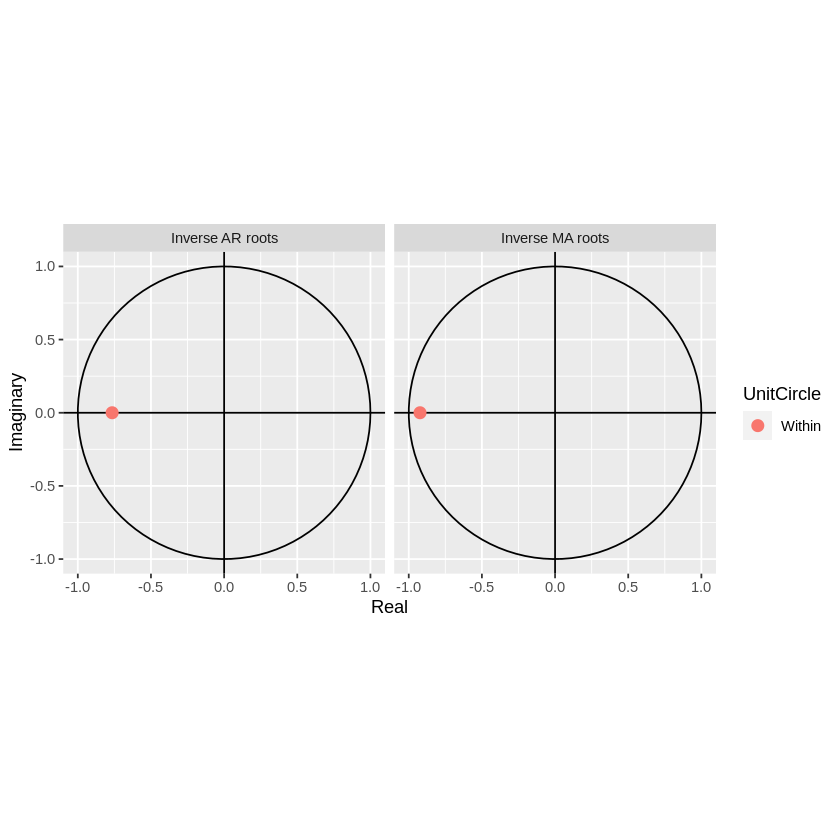

In [ ]:
autoplot(ARMA11)

## **Test sur la racine unitaire**

Lujung Box


	Ljung-Box test

data:  Residuals from ARIMA(1,0,1) with non-zero mean
Q* = 7.187, df = 8, p-value = 0.5166

Model df: 2.   Total lags used: 10



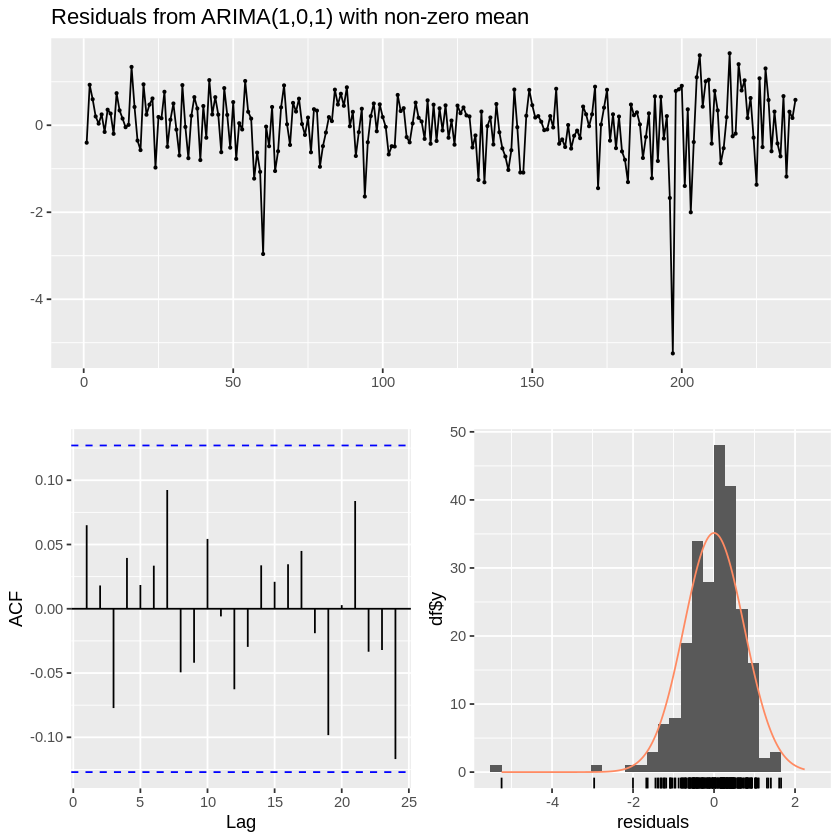

In [ ]:
checkresiduals(ARMA11,lags=15)

la p-value est supérieur à 5% -> les résidus ne sont pas autocorrélés
Les autocorrélations ne sont pas significatives indiciduellement au seuil de 5% jusqu'à l'ordre 20

Test de Engle: effet ARCH

In [ ]:
install.packages('FinTS')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library('FinTS')
ArchTest(ARMA11$residuals,lags=20)


Attaching package: ‘FinTS’


The following object is masked from ‘package:forecast’:

    Acf





	ARCH LM-test; Null hypothesis: no ARCH effects

data:  ARMA11$residuals
Chi-squared = 6.843, df = 20, p-value = 0.9972


la p value >5%, donc il n'y a pas d'effet arch

Test Jarque Bera sur la normalité des résidus

In [ ]:
library(tseries)
jarque.bera.test(ARMA11$residuals)


	Jarque Bera Test

data:  ARMA11$residuals
X-squared = 1138.9, df = 2, p-value < 2.2e-16


la p value c'est inférieure à 5% les résultats ne sont pas normalement distribués

##**Prévision**

    Point Forecast     Lo 95    Hi 95
239    0.297899613 -1.170127 1.765926
240   -0.121403806 -1.607563 1.364756
241    0.199496758 -1.297181 1.696175
242   -0.046094304 -1.548899 1.456711
243    0.141861021 -1.364521 1.648243
244   -0.001984622 -1.510457 1.506488
245    0.108103076 -1.401593 1.617799
246    0.023850950 -1.486561 1.534263
247    0.088330641 -1.422501 1.599162
248    0.038983156 -1.472094 1.550060
249    0.076749687 -1.434471 1.587971
250    0.047846271 -1.463459 1.559152

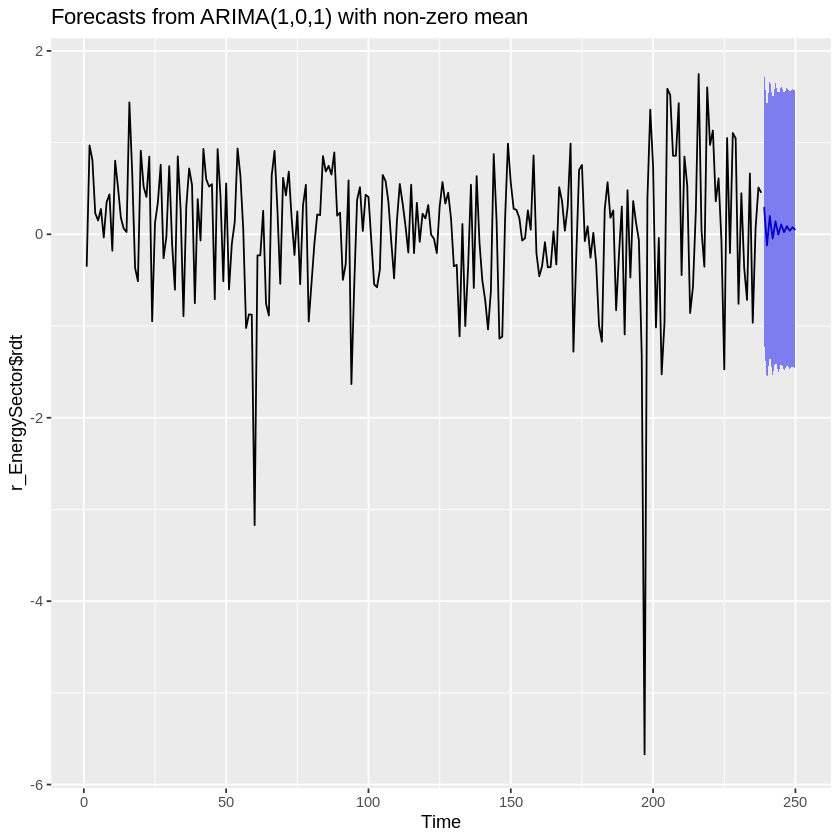

In [ ]:
library(forecast)
forecast_ARMA11<-forecast(ARMA11,h=12,level=95)
forecast_ARMA11
autoplot(forecast_ARMA11)


pour notre modèle, on a trouvé que la cst n'était pas significative. On estime le modèle avec les résultats du modèle ARMA

$$
\left\lbrace
\begin{array}{l}
dlES_{t} = -0.7653dlES_{t-1} - 0.9230\epsilon_{t-1} + \epsilon_{t} \\
\end{array}
\right.
$$
on a dlES_{t-1} = 0.45304062 et epsilon_{t-1}=0.582934649223341

In [ ]:
tail(ARMA11$residuals)
tail(EnergySector)

A Time Series:
[1] -0.7150694  0.6694713 -1.1808480  0.3112959  0.1671993  0.5829346

month,DataES_MonthlyMean,log_DataES
<date>,<dbl>,<dbl>
2023-03-01,623.6957,6.435663
2023-04-01,659.1595,6.490965
2023-05-01,608.2655,6.410611
2023-06-01,611.6171,6.416107
2023-07-01,638.2050,6.458660
2023-08-01,662.7600,6.496413


In [ ]:
forecast_ARMA11$mean
tail(EnergySector$log_DataES)

A Time Series:
 [1]  0.297899613 -0.121403806  0.199496758 -0.046094304  0.141861021
 [6] -0.001984622  0.108103076  0.023850950  0.088330641  0.038983156
[11]  0.076749687  0.047846271

[1] 6.435663 6.490965 6.410611 6.416107 6.458660 6.496413

In [ ]:
#recoloration
f1 = exp(6.4964129337011+0.297899613)
#*662.760
f2 = exp(-0.121403806)*f1
f3 = exp(0.199496758)*f2
f4 = exp(-0.046094304)*f3
f5 = exp(0.141861021)*f4
f6 = exp(-0.001984622)*f5
f7 = exp(0.108103076)*f6
f8 = exp(0.023850950)*f7
f9 = exp(0.088330641)*f8
f10 = exp(0.038983156 )*f9
f11 = exp(0.076749687)*f10
f12 = exp(0.047846271)*f11

f1
f2
f3
f4
f5
f6
f7
f8
f9
f10
f11
f12

[1] 892.7553

[1] 790.6922

[1] 965.2677

[1] 921.7843

[1] 1062.279

[1] 1060.173

[1] 1181.205

[1] 1209.717

[1] 1321.433

[1] 1373.964

[1] 1483.568

[1] 1556.276

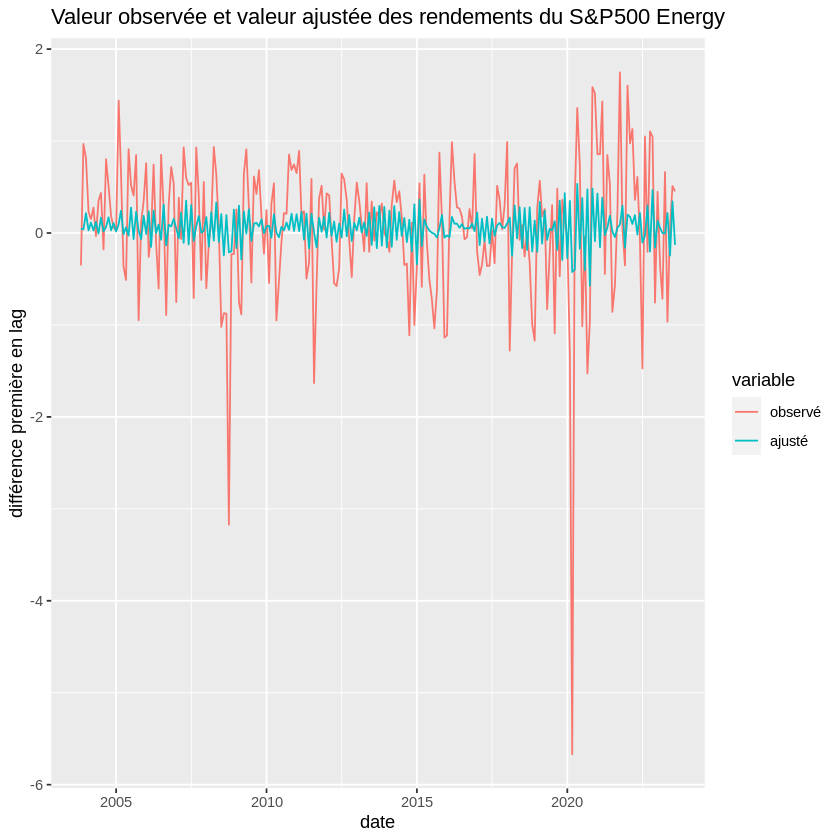

In [ ]:
df_plot<-data.frame(r_EnergySector$Date[1:238],r_EnergySector$rdt[1:238],F=as.matrix(ARMA11$fitted))
colnames(df_plot)<-c("date","observé","ajusté")

data_melt=melt(as.data.frame(df_plot),id.vars = 1)

p_F_us<-ggplot(data=data_melt,aes(x=date))+geom_line(aes(x=date,y=value,color= variable))
p_F_us+labs(y="différence première en lag",title = "Valeur observée et valeur ajustée des rendements du S&P500 Energy",
            )

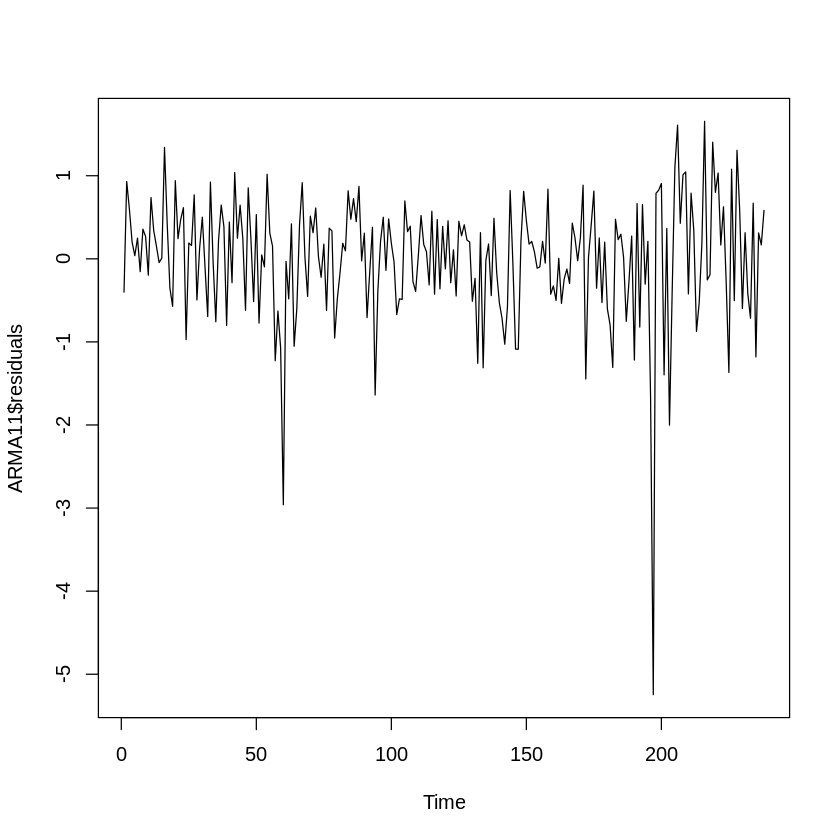

In [ ]:
library(tseries)
library(FinTS)
plot(ARMA11$residuals)

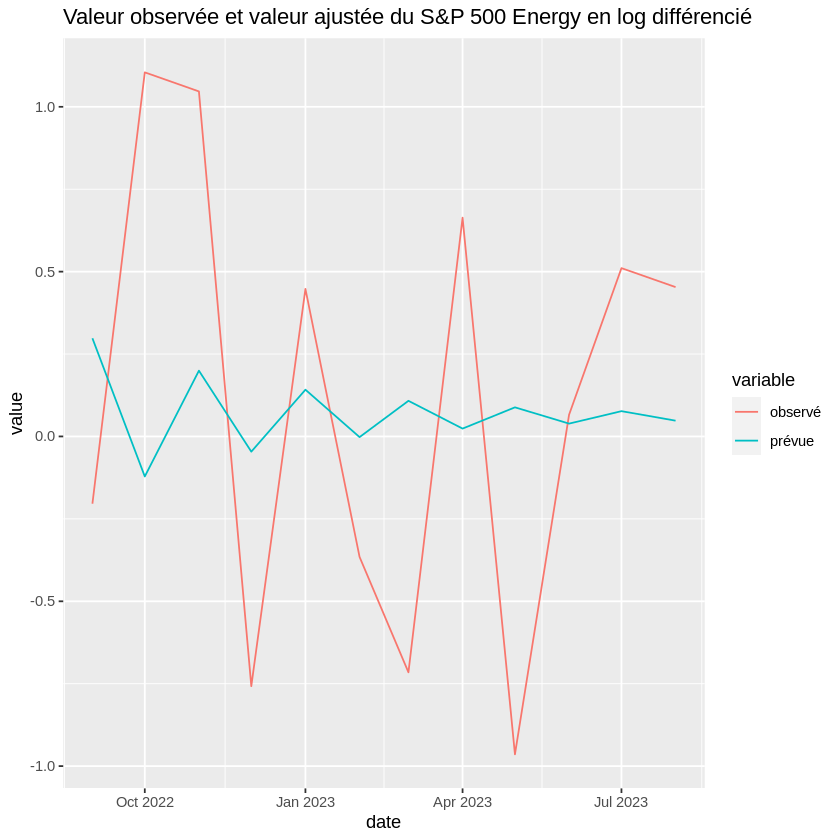

In [ ]:
library(data.table)
library(ggplot2)
library(reshape2)

df_forc<-data.frame(r_EnergySector$Date[227:238],r_EnergySector$rdt[227:238],as.matrix(forecast_ARMA11$mean))
colnames(df_forc)<-c("date","observé","prévue")


data_F_melt=melt(as.data.frame(df_forc),id.vars = 1)

p_g_us<-ggplot(data=data_F_melt,aes(x=date))+geom_line(aes(x=date,y=value,color= variable))
p_g_us+labs(title = "Valeur observée et valeur ajustée du S&P 500 Energy en log différencié",
            )

Les valeurs prévues ne correspondent pas aux valeures observées.

In [ ]:
library(Metrics)
sprintf("MAE out of sample %f",mae(df_forc$observé,df_forc$prévue))
sprintf("RMSE out of sample %f",rmse(df_forc$observé,df_forc$prévue))

[1] "MAE out of sample 0.611463"

[1] "RMSE out of sample 0.692390"

les valeurs du MAE et du RMSE sont très élevés ce qui signifie que le modèle n'est pas en adéquation avec les valeurs observées

#**Modèle VAR**

# Modèle VAR

Calculdes données en log et représentation  graphique

In [ ]:
df_ES<-EnergySector[,c("month","log_DataES")]
colnames(df_ES)<-c("date","logES")
df_fed<-FEDFUND[,c("Date","log_DataFF")]
colnames(df_fed)<-c("date","logFF")
df<-merge(df_ES,df_fed,by="date")
df<-df["1980-01-01"<=df$date,]
tail(df)
tail(data.frame(EnergySector$log_DataES))

,date,logES,logFF
,<date>,<dbl>,<dbl>
233,2023-03-01,6.435663,1.536867
234,2023-04-01,6.490965,1.574846
235,2023-05-01,6.410611,1.621366
236,2023-06-01,6.416107,1.625311
237,2023-07-01,6.458660,1.633154
238,2023-08-01,6.496413,1.673351


,EnergySector.log_DataES
,<dbl>
234,6.435663
235,6.490965
236,6.410611
237,6.416107
238,6.458660
239,6.496413


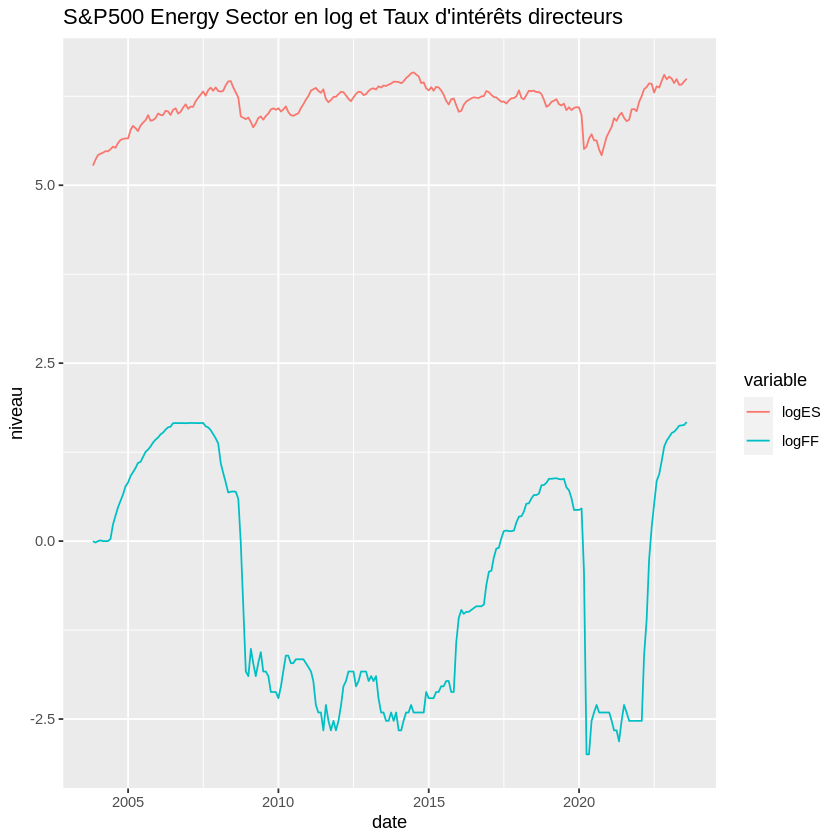

In [ ]:
library(ggplot2)
library(reshape2)
data_melt=melt(as.data.frame(df),id.vars = 1)

p_us_T<-ggplot(data=data_melt,aes(x=date))+geom_line(aes(x=date,y=value,color=variable))
p_us_T+labs(y="niveau",title = "S&P500 Energy Sector en log et Taux d'intérêts directeurs",
            )

Calcul des différences premières et graphique sur les dif premières

In [ ]:
df_g<-data.frame(df$date[-1],diff((df$logES)),diff((df$logFF)))
# on perd une observation en calculant le taux de croissance
colnames(df_g)<-c("date","g_ES","g_FF")
tail(df_g)

,date,g_ES,g_FF
,<date>,<dbl>,<dbl>
232,2023-03-01,-0.059623714,0.017354015
233,2023-04-01,0.055302986,0.037979248
234,2023-05-01,-0.080354109,0.046520016
235,2023-06-01,0.005495114,0.003944778
236,2023-07-01,0.042553045,0.007843177
237,2023-08-01,0.037753385,0.040196799


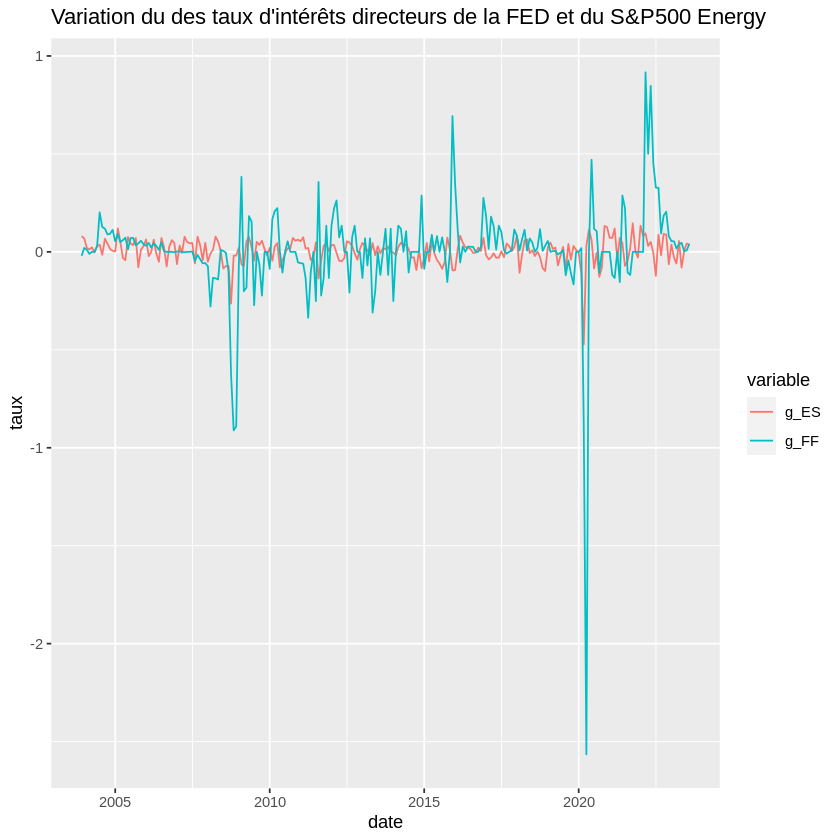

In [ ]:
data_melt=melt(as.data.frame(df_g),id.vars = 1)

p_g_us<-ggplot(data=data_melt,aes(x=date))+geom_line(aes(x=date,y=value,color= variable))
p_g_us+labs(y="taux",title = "Variation du des taux d'intérêts directeurs de la FED et du S&P500 Energy",
            )

Statistiques descriptives

In [ ]:
summary(df_g[c("g_ES","g_FF")])
sapply(df_g[c("g_ES","g_FF")],sd)

      g_ES                g_FF          
 Min.   :-0.472492   Min.   :-2.564949  
 1st Qu.:-0.029010   1st Qu.:-0.008658  
 Median : 0.014461   Median : 0.001903  
 Mean   : 0.005151   Mean   : 0.007061  
 3rd Qu.: 0.045077   3rd Qu.: 0.072571  
 Max.   : 0.145587   Max.   : 0.916291  

g_ES       g_FF 
0.06408546 0.25298511

Quand onregarde l'écart type ( dif entre le max et le min), on voit que le taux de croisssance des FF est plus variable que celui de S&P 500 Energy

In [ ]:
cor.test(df_g$g_ES,df_g$g_FF)


	Pearson's product-moment correlation

data:  df_g$g_ES and df_g$g_FF
t = 2.1471, df = 235, p-value = 0.03281
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.01148265 0.26151773
sample estimates:
    cor 
0.13871 


la p-value est <  à 0.05, donc la corrélation est significative.

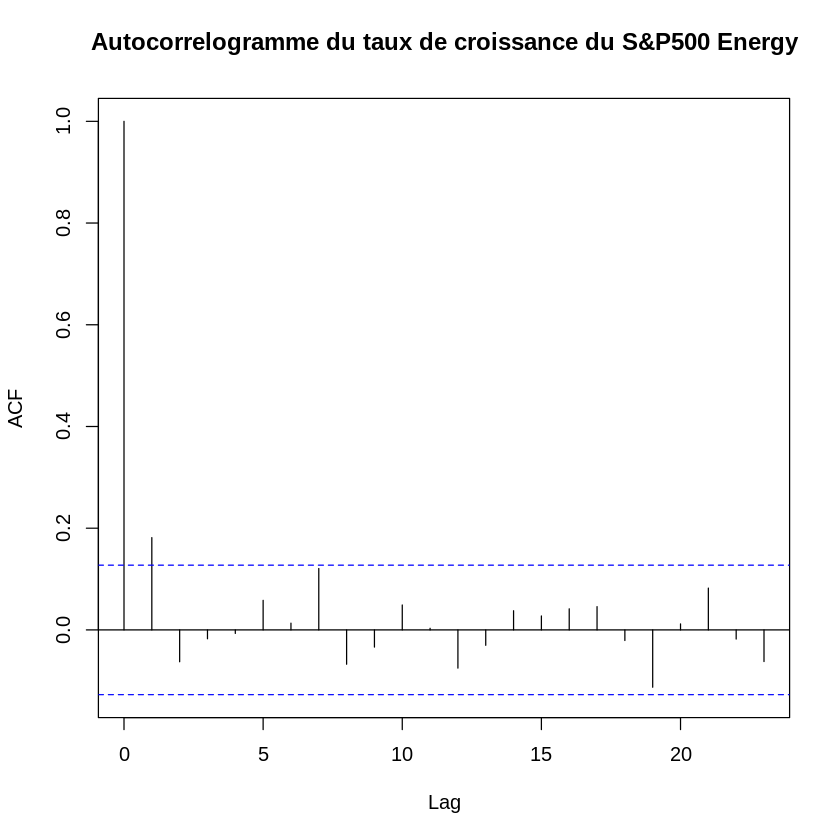

In [ ]:
acf(df_g$g_ES,main="Autocorrelogramme du taux de croissance du S&P500 Energy")

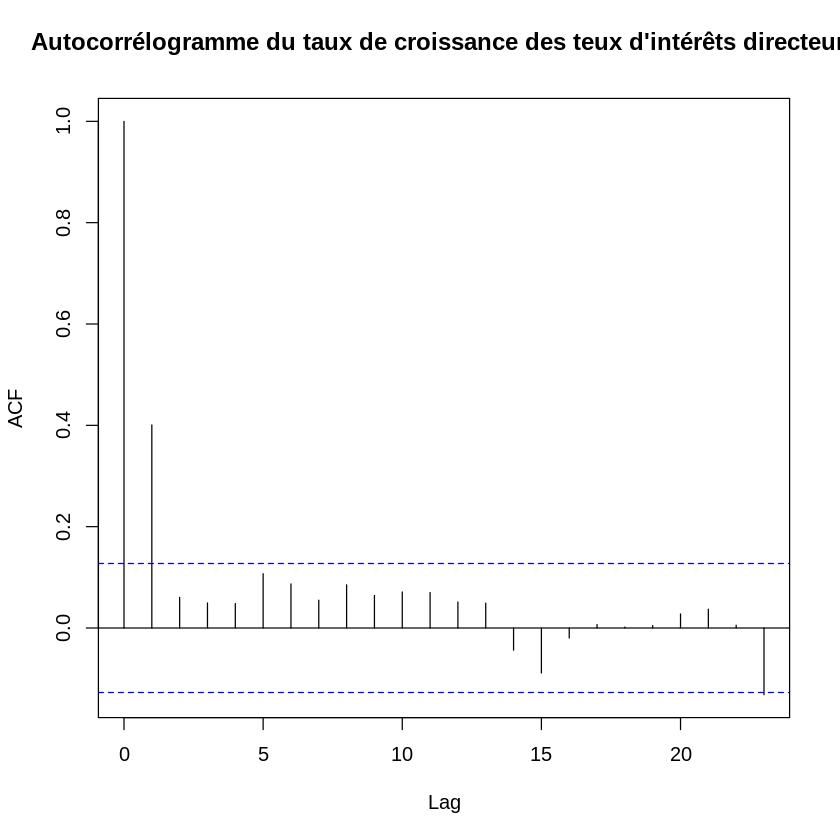

In [ ]:
acf(df_g$g_FF,main="Autocorrélogramme du taux de croissance des teux d'intérêts directeurs")

### Modélisation VAR (vectoriel autoregressif)

In [ ]:
library(vars)
pselect<-VARselect(y=df_g[,c(2,3)],lag.max=15,type=c("const"))
pselect$criteria # Affichage des valeurs des critère de sélection
pselect$selection # nombre de retards optimal selon les critères de sélection

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: strucchange

Loading required package: sandwich



,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
AIC(n),-8.6523530963,-8.6178918760,-8.6066155549,-8.586214366,-8.5852034809,-8.5688977299,-8.5473894946,-8.5505709107,-8.5264775095,-8.5103015519,-8.4812797204,-8.4563883810,-8.428671832,-8.4007838388,-8.377684377
HQ(n),-8.6152236562,-8.5560094759,-8.5199801946,-8.474826045,-8.4490622005,-8.4080034894,-8.3617422940,-8.3401707501,-8.2913243888,-8.2503954711,-8.1966206795,-8.1469763800,-8.094506870,-8.0418659177,-7.994013496
SC(n),-8.5603888427,-8.4646181201,-8.3920322966,-8.310321605,-8.2480012179,-8.1703859645,-8.0875682268,-8.0294401405,-7.9440372370,-7.8665517770,-7.7762204431,-7.6900196013,-7.600993549,-7.5117960544,-7.427387090
FPE(n),0.0001747158,0.0001808438,0.0001828995,0.000186678,0.0001868805,0.0001899728,0.0001941311,0.0001935509,0.0001983182,0.0002016117,0.0002076228,0.0002129465,0.000219041,0.0002253669,0.000230788


AIC(n)  HQ(n)  SC(n) FPE(n) 
     1      1      1      1

tous les critères (AIC, HQ, SC et FPE) nous préconnisent d'utiliser 1 retard. On a un VAR(1)

In [ ]:
var.1lag <-VAR(y = df_g[,c("g_ES","g_FF")],type="const",lag.max = 1)
summary(var.1lag) #Affichage des résultats avec summary


VAR Estimation Results:
Endogenous variables: g_ES, g_FF 
Deterministic variables: const 
Sample size: 236 
Log Likelihood: 367.889 
Roots of the characteristic polynomial:
0.3851 0.3851
Call:
VAR(y = df_g[, c("g_ES", "g_FF")], type = "const", lag.max = 1)


Estimation results for equation g_ES: 
g_ES = g_ES.l1 + g_FF.l1 + const 

         Estimate Std. Error t value Pr(>|t|)   
g_ES.l1  0.205420   0.063906   3.214  0.00149 **
g_FF.l1 -0.043423   0.016180  -2.684  0.00780 **
const    0.004102   0.004067   1.009  0.31419   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Residual standard error: 0.06228 on 233 degrees of freedom
Multiple R-Squared: 0.06215,	Adjusted R-squared: 0.0541 
F-statistic: 7.721 on 2 and 233 DF,  p-value: 0.0005668 


Estimation results for equation g_FF: 
g_FF = g_ES.l1 + g_FF.l1 + const 

        Estimate Std. Error t value Pr(>|t|)    
g_ES.l1  1.82234    0.20749   8.783 3.51e-16 ***
g_FF.l1  0.33675    0.05253   6.410 7.99e-10 ***
const

Pour g_ES:


*   Les coefs sont significatifs à un risque de première espèce à 1%, donc le modèle est good, la constante n'est pas significative
*  Le coef des fed funds est négatif, une acceleration de l'augmentation des taux d'intérês directeurs a tendence à faire baisser les rendements de l'indice du S&P500 Energy
*   le coef gES est positif donc les renements de l'indice sont fortement corrélés avec les rendements passés
*   le R squared est égal à 6,22%, c'est à dire que 6,22% de la variance peut être expliquée par notre modèle (à vérifier)




Pour g_FF

*   les coefficients sont sifgnificatifs pour un risque de première espèce de 0,1%, le moèle est good, la constante n'est pas significative
*   le coef du fed fud est positif, ce qui indice que la valeur du Fed fund est corrélé avec ses valeurs passées
*   Le coef du ES est positif ce qui indique qu'une augmentation de l'indice boursier fait augmenter les taux d'intérêts dirrecteurs
*   le R squared est égal à 36,93%, c'est à dire que 36,93% de la variance peut être expliquée par notre modèle (à vérifier)

Le R squared de g_FF est plus grand que celui de g_ES donc gFF explique mieux le modèe


In [ ]:
roots(var.1lag)

[1] 0.3851039 0.3851039

l'inverse des racine est strictement inférieure à 1: la condition de stationnarité est satisfaite

##### affichage des résultats



* **Exemple 1 : Liste des matrices des coefficients estimés du VAR**

In [ ]:
A<-Acoef(var.1lag)
A

,g_ES.l1,g_FF.l1
g_ES,0.2054203,-0.04342263
g_FF,1.8223416,0.33674465


\* **Exemple 2 : Variable ajustée du taux de croissance du revenu g_inc**


Warning message in plot.xy(xy, type, ...):
“plot type 'line' will be truncated to first character”


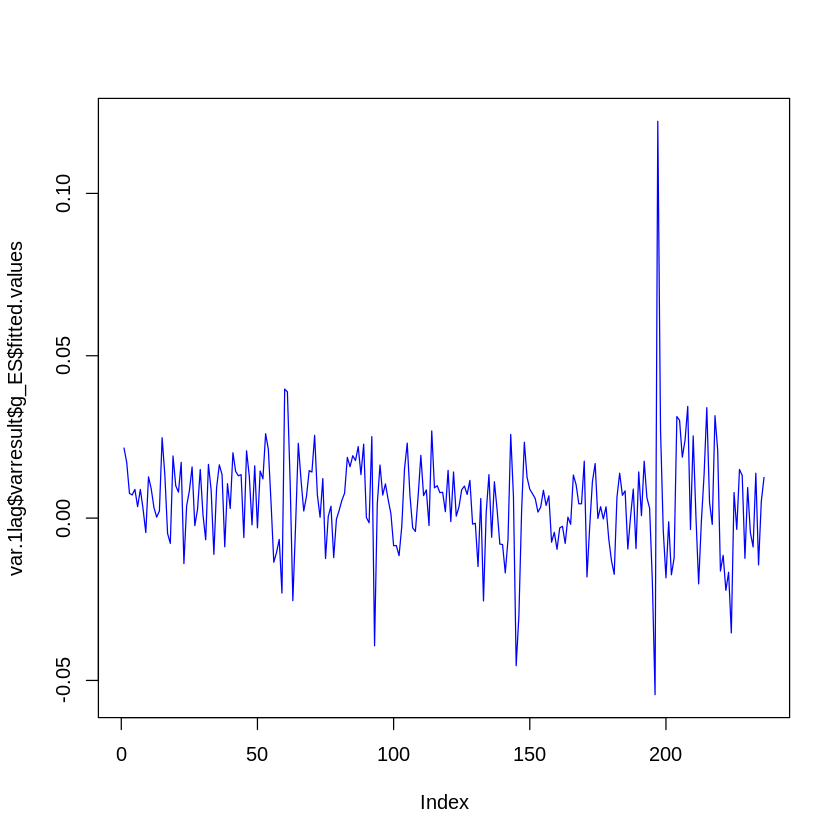

In [ ]:
plot(var.1lag$varresult$g_ES$fitted.values,type='line',col='blue')

#### Test de causalité au sens de Granger


##### Causalité de la consommation sur le revenu

On vérifie la significativité du coefficient de $g\_ES_{t-1}$ dans l'équation de $g\_FF_{t}$. Les hypothèses du test sont :

$$
\left\lbrace
\begin{array}{l}
H_{0} : a_{12}^{1}=0\Rightarrow\,g\_ES\,\mathrm{ne\,cause\,pas}\,g\_FF\\
H_{a} : a_{12}^{1}\neq 0 \Rightarrow\,g\_ES\,\mathrm{cause}\,g\_FF
\end{array}
\right.
$$

In [ ]:
causality(var.1lag,cause=c('g_ES'))

$Granger

	Granger causality H0: g_ES do not Granger-cause g_FF

data:  VAR object var.1lag
F-Test = 77.137, df1 = 1, df2 = 466, p-value < 2.2e-16


$Instant

	H0: No instantaneous causality between: g_ES and g_FF

data:  VAR object var.1lag
Chi-squared = 4.2328, df = 1, p-value = 0.03965



Pour savoir s'il  y a un lien de causalité des rendements du S&P500 aux taux d'intérêts directeurs, on compare la p-value à alpha, ici p-value < alpha, il y a une causalité des rendements du S&P500 vers les teux d'intérêts directeurs

In [ ]:
causality(var.1lag,cause=c('g_FF'))

$Granger

	Granger causality H0: g_FF do not Granger-cause g_ES

data:  VAR object var.1lag
F-Test = 7.2021, df1 = 1, df2 = 466, p-value = 0.007541


$Instant

	H0: No instantaneous causality between: g_FF and g_ES

data:  VAR object var.1lag
Chi-squared = 4.2328, df = 1, p-value = 0.03965



Pour savoir s'il  y a un lien de causalité des taux d'intérêts directeurs aux rendements du S&P500, on compare la p-value à alpha, ici p-value < alpha, il y a une causalité des taux d'intérêts directeurs vers les rendements du S&P500



On oberserve une significativité des causalité de chaque variable sur l'autre c'est à dire que les deux variables s'entraient entre elles. L'effet d'une hausse des taux d'intérêts directeurs a pour effet de faire baisser les rendements du S&P 500 Energyet dans l'autre sens une hausse des rendements du S&P 500 Energy cause une hausse des taux d'intérêts directeurs
Comme les variables se causent entre elles avec les tests de Granger, on ne peut pas savoir quelle variable cause l'une plus que l'autre

####Fonction ipulsion réponse

c'est pour tracer l'effet d'un choc au temps t sur une des variables. Comme on n'a pas eu de résultats qui nous permet de dire qui cause l'autre on suppose, en regardant le graphique X (celui avec les deux séries stationnarisées) qu'une hausse des rendementss du S&P500 Energy précède une hausse des taux d'intérêts directeurs. On met donc g_ES avant g_FF

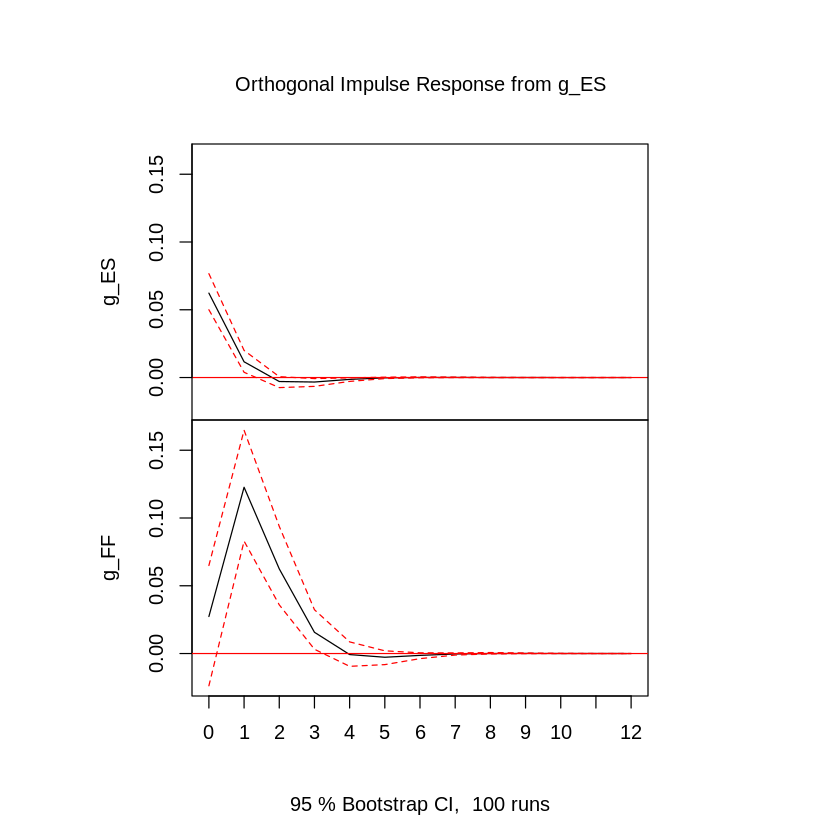

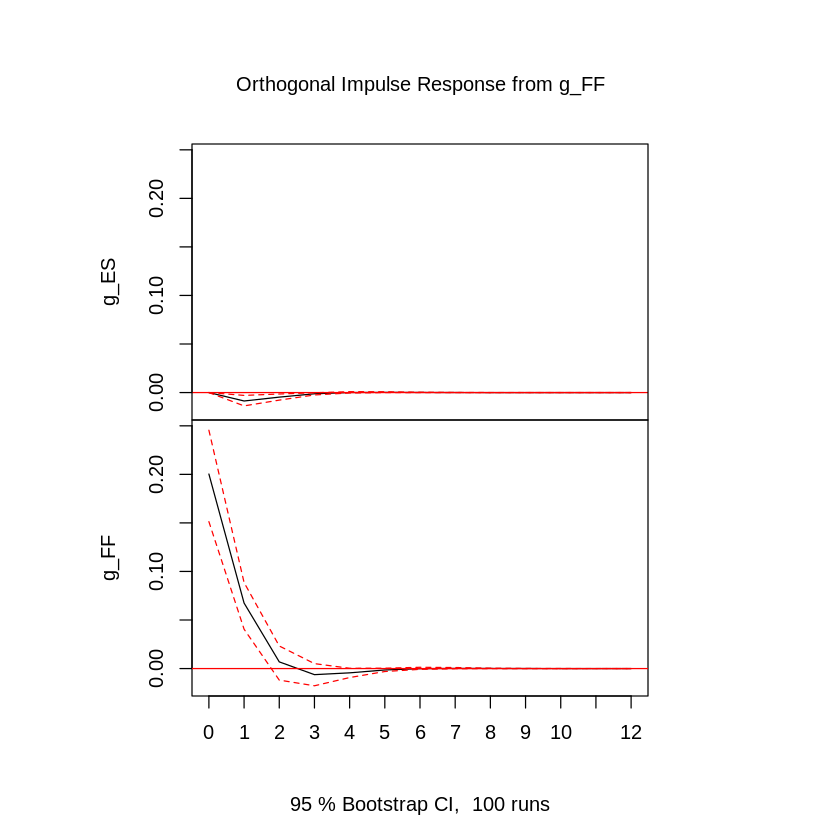

In [ ]:
irf<-irf(var.1lag,n.ahead = 12,ortho = TRUE,ci=0.95)
plot(irf)

Effet d'un choc de g_ES
*   sur g_ES: après un choc de g_ES, les rendements du S&P 500 energy continuent d'augmenter (+ sur le graphique) mais de moins en moins rapidement
*   sur g_FF: les taux d'intérêts directeurs de la Fed vont fortement augmenter en t+1 et continueront d'augmenter mais  moins rapidement entre t=1 et t=4

Effet d'un choc de g_FF
*   sur g_ES: atrès peu d'impact: les rendements diminuent un peu mais pas flagrant
*   sur g_FF: les taux d'intérêts directeurs de la Fed vont continuer à augmenter jusqu'en t=2 mais de plus en plus doucement


## estimation des IRF par projection locales (deuxième point du 8)

on fixe les critères suivants:
*   nombre de lag qui correspond au critère AIC (3 retard si AIC = faux)
*   0 pour pas de trend
*   le type du choc en écart type
*   niveau de confiance = 1.96
*   un horizon de 12 (pour 1 an)








[[1]]
NULL


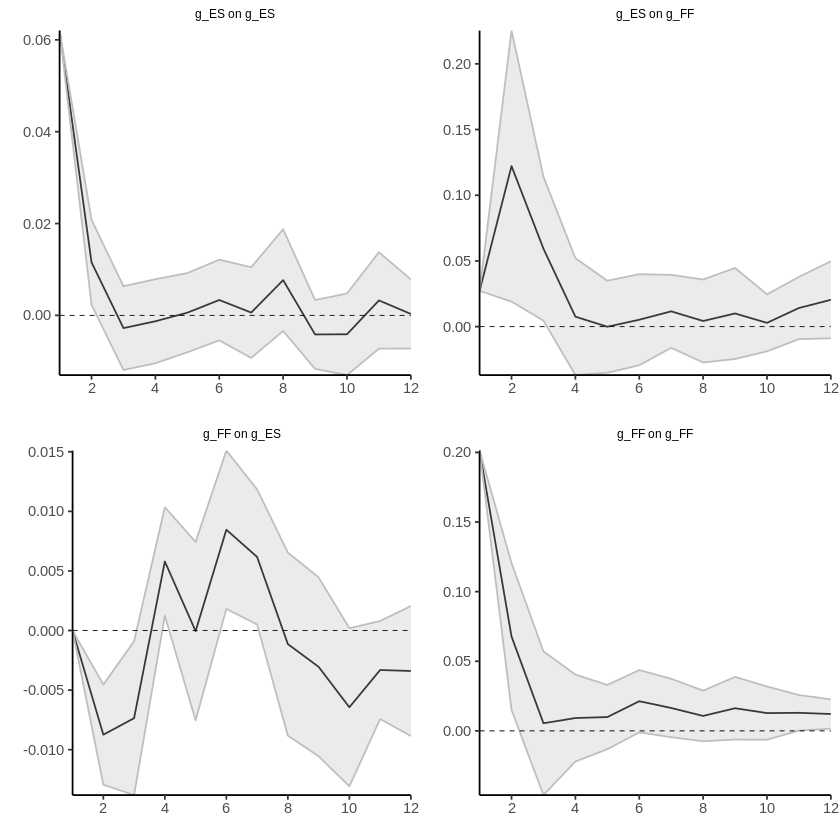

In [ ]:
library(lpirfs)
irf_LP <-lp_lin(endog_data = df_g[, c(2, 3)],    #colonnes 2 et 3
                    lags_endog_lin = NaN,
                    lags_criterion = 'AIC',
                    max_lags = 3,
                    trend = 0,
                    shock_type = 0,
                    confint=1.96,
                    hor=12,
                    adjust_se=TRUE)

plot(irf_LP)

interprétation: même chose que avant

**Affichage des valeurs de la fonction impulsion - réponse de ES**


In [ ]:
irf_LP$irf_lin_mean[,,1]


0.06200954,0.01155656,-0.002766805,-0.001279043,0.0005873853,0.003345634,0.0006110043,0.007674614,-0.004148573,-0.004112517,0.003256785,0.0003084216,-0.004808978
0.02720838,0.12216485,0.059301516,0.007600176,-0.0000693231,0.005270012,0.0116435317,0.004297300,0.010029832,0.002883386,0.014182996,0.0204385727,0.013177838


**Affichage des valeurs de la fonction impulsion - réponse de FF**


In [ ]:
irf_LP$irf_lin_mean[,,2]

0.0000000,-0.00874238,-0.007354362,0.005791755,-5.476154e-05,0.00845699,0.006171551,-0.001140953,-0.003047625,-0.006440237,-0.00331547,-0.00339627,-0.001287056
0.2013324,0.06779759,0.005469194,0.009228528,9.896133e-03,0.02129789,0.016429067,0.010725071,0.016255582,0.012767682,0.01295259,0.01210576,0.009031623


idk ce qu'on doit dire de ça:

In [ ]:
irf_LP$specs$chosen_lags

1
1
2
1
1
1
2
1
1
1
1


 Decomposition de la variance

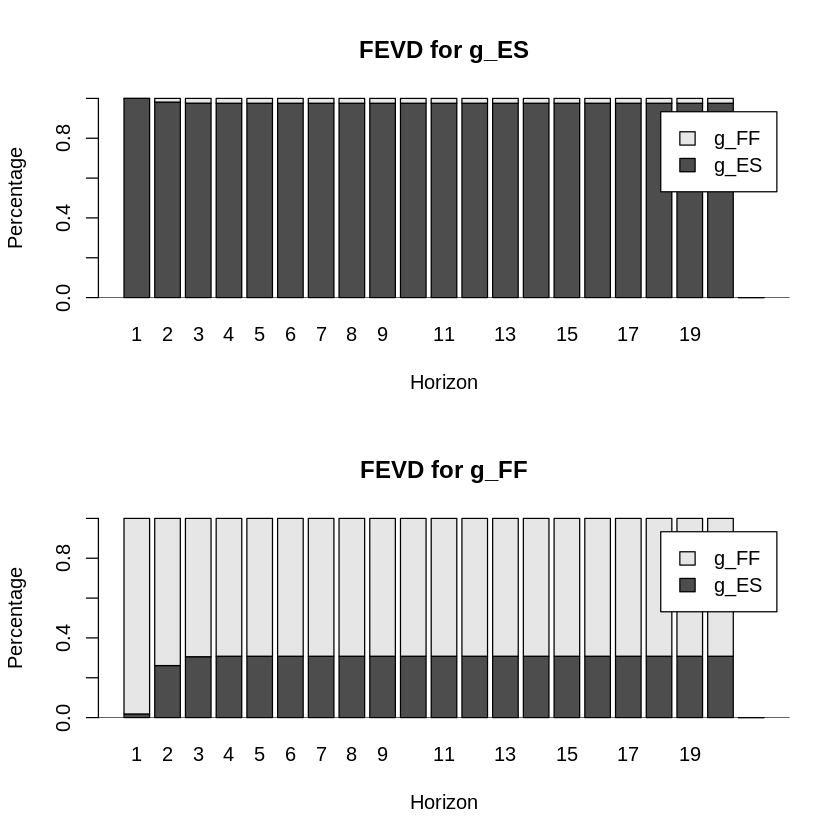

In [ ]:
dec_var <-fevd(var.1lag,n.ahead=20)

plot(dec_var)

## Calcul des prévisions

         Length Class  Mode   
fcst       2    -none- list   
endog    474    -none- numeric
model     10    varest list   
exo.fcst   0    -none- NULL   

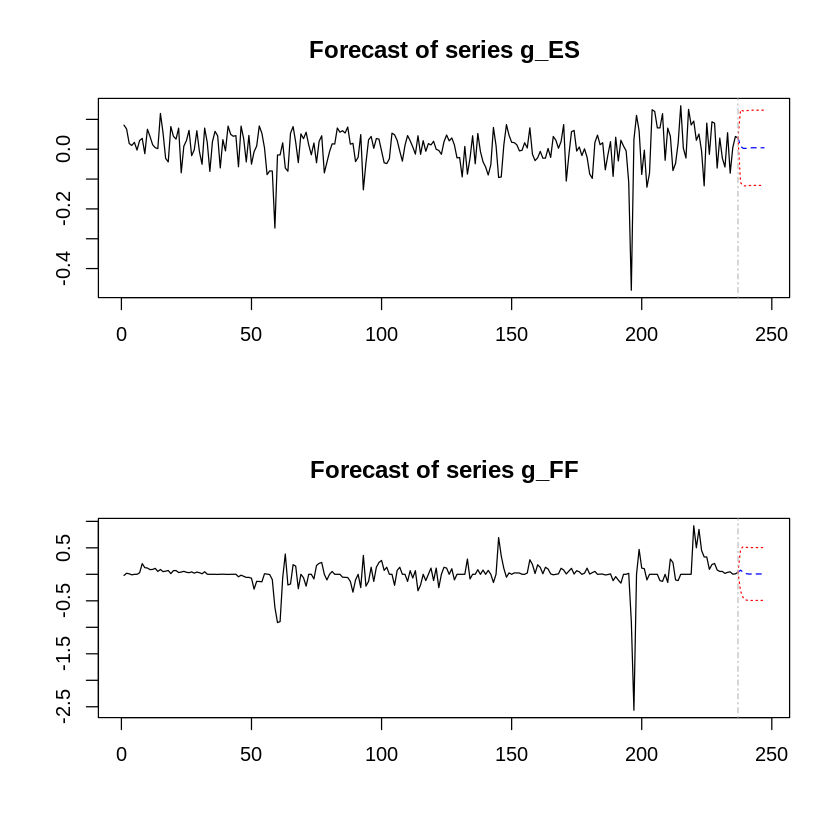

In [ ]:
forecast<-predict(var.1lag,n.ahead = 10, ci=0.95)

summary(forecast)
plot(forecast)

## Test de cointégration de Jonansen

Nous avons deux processus DS, il est alors bon de tester les relations de cointégrations

#### test de la trace

In [ ]:
library(vars)
df_g_bis<- df_g[,c('g_ES','g_FF')] # on définit un dataframe qui contient les variables pour lesquelles on teste l'existence de la cointégration
pselect<-VARselect(y=df_g_bis,lag.max=12,type=c("const"))
pselect$selection

AIC(n)  HQ(n)  SC(n) FPE(n) 
     1      1      1      1

In [ ]:
library(urca)
ES_FF.vecm<-ca.jo(df_g_bis,ecdet = "none",spec = "transitory",type = 'trace')
summary(ES_FF.vecm)


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend 

Eigenvalues (lambda):
[1] 0.3579219 0.2428400

Values of teststatistic and critical values of test:

           test 10pct  5pct  1pct
r <= 1 |  65.37  6.50  8.18 11.65
r = 0  | 169.49 15.66 17.95 23.52

Eigenvectors, normalised to first column:
(These are the cointegration relations)

           g_ES.l1   g_FF.l1
g_ES.l1  1.0000000 1.0000000
g_FF.l1 -0.1419084 0.5391101

Weights W:
(This is the loading matrix)

          g_ES.l1    g_FF.l1
g_ES.d -0.5836344 -0.2198887
g_FF.d  2.3679799 -0.6042065


On pose les hypothèses suiantes:
$$\left\lbrace
\begin{array}{l}
H_{0}(0) : r =rang(\Pi)\leq 0\\
H_{a}(0) : r =rang(\Pi)> 0
\end{array}
\right.$$
La statistique de test est :
$$
Q(0)= -T\sum_{i=1}^{2} ln(1-\hat{\lambda}_{i})=169,49
$$

Le seuil de rejet pour un risque de première espèce est égal à 17,95. Ainsi Q(0) est supérieur au seuil de rejet, il n'existe pas de relation de cointégration au rang r<= 0 et pour un risuqe de première espèce de 5%

On peut maintenanttester au rang <= 1, on pose les hypothèses:
On pose les hypothèses suiantes:
$$\left\lbrace
\begin{array}{l}
H_{0}(0) : r =rang(\Pi)\leq 1\\
H_{a}(0) : r =rang(\Pi)> 1
\end{array}
\right.$$
La statistique de test est :
$$
Q(1)= -T ln(1-\hat{\lambda}_{2})=65,37
$$
qui est supérieur au seuil critique pour un risuqe de première espèce de 5% (= 8,18). On rejette également la présence d'une relation de cointégartion.

####Test de la valeur propre maximale

In [ ]:
ES_FF.vecm_eigen<-ca.jo(df_g_bis,ecdet = "const",spec = "transitory",type = 'eigen')
summary(ES_FF.vecm_eigen)


###################### 
# Johansen-Procedure # 
###################### 

Test type: maximal eigenvalue statistic (lambda max) , without linear trend and constant in cointegration 

Eigenvalues (lambda):
[1] 3.579267e-01 2.428407e-01 5.551115e-17

Values of teststatistic and critical values of test:

           test 10pct  5pct  1pct
r <= 1 |  65.37  7.52  9.24 12.97
r = 0  | 104.12 13.75 15.67 20.20

Eigenvectors, normalised to first column:
(These are the cointegration relations)

              g_ES.l1      g_FF.l1    constant
g_ES.l1   1.000000000  1.000000000  1.00000000
g_FF.l1  -0.141905528  0.539149504 -0.05436122
constant -0.003583329 -0.008212038 -8.75555022

Weights W:
(This is the loading matrix)

          g_ES.l1    g_FF.l1      constant
g_ES.d -0.5836496 -0.2198735  2.177369e-19
g_FF.d  2.3679548 -0.6041815 -9.547719e-20


on pose les hypothèses suivantes:
$$\left\lbrace
\begin{array}{l}
H_{0}(0) : r =rang(\Pi)\leq 0\\
H_{a}(0) : r =rang(\Pi)> 0
\end{array}
\right.$$
La statistique du test de la trace est :
$$
Q(0)= -T\sum_{i=1}^{2} ln(1-\hat{\lambda}_{i})=104,12
$$
Q(0) est supérieur au seuil critique pour un risuqe de première espèce de 5% (=15,67). On teste donc Q(1); on teste s'il existe une relation de cointégration égal à 0, on pose les hypothèses:
$$\left\lbrace
\begin{array}{l}
H_{0}(0) : r =rang(\Pi)\leq 1\\
H_{a}(0) : r =rang(\Pi)> 1
\end{array}
\right.$$
La statistique de test de la trace est égale à
$$
Q(1)= -T ln(1-\hat{\lambda}_{2})=65,37
$$
ce qui est supérieur au seuil critique pour un risuqe e première espèce = à 5% (=9,24). On rejette l'hypothèse nulle, il n'existe pas de relation de cointégration.

Estimation du VCEM: non parce qu'il n'y a pas de relation de cointégration

Il n'existe aucune relation de cointégration